In [2]:
pip install geopandas


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/cb/7b/2fb6ab376c78d2e60812ad0bf4b24889309d2aeb543f54efcd586c69907f/geopandas-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.19 from https://files.pythonhosted.org/packages/b0/7f/2de46a2630f609b7520d74ffc7692d4969b1fa1dd3c82f62c7967183d365/Fiona-1.9.4.post1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/50.6 kB ? eta -:--:--
     ------------------------ --------------- 30.7/50.6 kB ? eta -:--:--
     ------------------------ --------------- 30.7/50.6 kB ? eta -:--:--
     -------------------------------------- 50.6/50.6 kB 367.3 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.0.1 from https://files.pythonhosted.org/packages/c8/5a/215a1894e50167d91b471d8fc413ca30034c48e5d3dfac78d12df4c840d5/pyproj-3.6.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/1.4 MB ? eta -:--

# QHousing in London
Introduction
Hello readers! The topic of this notebook is the housing market of London in the years between 1995 and 2020. We are going to perform exploratory data analysis with the goal of discovering new information and answering the following questions:

How has the housing market (average house price and number of houses sold) changed over the years in different boroughs of London? How does it compare to England?
What factors affected it the most?

Table of Contents

Introduction
Libraries
Meet the Datasets
London Housing over the Years
Factors Affecting Housing
Conclusions
Libraries
We start by importing the necessary libraries and setting some parameters for the whole notebook (e.g. the display format for the pandas library).

# Reason
import numpy as np: This imports the NumPy library, which is used for numerical and mathematical operations in Python. It's often aliased as np for brevity.

import pandas as pd: This imports the Pandas library, a powerful data manipulation and analysis tool. It's often aliased as pd for brevity.

from pandas.plotting import scatter_matrix: This imports a specific function (scatter_matrix) from the pandas.plotting module. scatter_matrix is used to create scatterplot matrices for exploring relationships between variables in a DataFrame.

import matplotlib.pyplot as plt: This imports the Matplotlib library, which is a widely used library for creating static, animated, or interactive visualizations in Python. It's often aliased as plt for brevity.

%config InlineBackend.figure_format = 'retina': This is a Jupyter Notebook-specific configuration to set the figure format to 'retina,' which is a high-resolution display format. This line is not required if you're not using Jupyter Notebook.

import seaborn as sns: This imports the Seaborn library, which is built on top of Matplotlib and provides a higher-level interface for creating attractive statistical graphics and plots.

from IPython.display import HTML: This imports a class HTML from the IPython.display module. It allows you to display HTML content within an IPython environment, such as Jupyter Notebook.

import warnings: This imports the warnings module, which can be used to handle warning messages in your code.

warnings.filterwarnings('ignore'): This line suppresses warning messages so that they won't be displayed. It's often used to avoid cluttering the output with non-essential warnings.

import gif: It appears that there is a library called gif being imported, but it's not a standard Python library. This might be a custom or third-party library for working with GIF images or animations. Without additional context, it's not clear why this library is being imported.

The reason for importing these libraries is to use their functions and capabilities for data analysis, visualization, and potentially handling HTML content and warnings. The specific libraries you import will depend on the requirements of your data analysis or visualization project. Each library serves a different purpose, and you import them as needed to access their functions and classes.




User
when this function needed
ChatGPT
The specific functions and libraries you import are needed when you have tasks that require their functionality. Let's break down when you might need some of these functions:

NumPy (import numpy as np): NumPy is commonly used for numerical computations, such as mathematical operations on arrays and matrices. You might need it when working with numerical data, performing mathematical calculations, or manipulating arrays.

Pandas (import pandas as pd): Pandas is essential for data manipulation and analysis. You'll use it when you need to load, clean, transform, filter, or analyze tabular data, such as CSV or Excel files.

Matplotlib (import matplotlib.pyplot as plt): Matplotlib is used for creating static and interactive visualizations. You'll need it when you want to generate plots, charts, and graphs to visualize your data.

Seaborn (import seaborn as sns): Seaborn is often used in conjunction with Matplotlib to create more aesthetically pleasing and statistically informative visualizations. It's handy when you want to quickly produce attractive statistical plots.

IPython.display (from IPython.display import HTML): This is used in IPython environments like Jupyter Notebook when you want to display HTML content within your notebook. You might use it when you need to embed HTML elements or content in your interactive documentation.

warnings (import warnings) and warnings.filterwarnings('ignore'): These are used when you want to suppress warning messages generated by various Python libraries. It can be helpful in preventing warning messages from cluttering your output.

gif (Custom or Third-Party Library): The gif library, which is not a standard Python library, would be imported when you have a specific need to work with GIF images or animations. It could be used for creating, manipulating, or displaying GIFs in your project.

The need for these functions and libraries depends entirely on the nature of your data analysis or visualization task. You import them when you require their features to accomplish specific goals within your Python code. Different projects and tasks may require different combinations of these libraries.

In [4]:
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix
import geopandas as gpd

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install gif
import gif

In [7]:
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format

font_size = 17


In [ ]:
Datasets
We are going to use the Housing in London dataset. It contains two csv files ('housing_in_london_monthly_variables.csv' and 'housing_in_london_yearly_variables.csv') with a lot of relevant information such as the monthly average house prices, yearly mean and median salary for residents of each area, etc.

The data is split by areas of London called boroughs, but some of the instances correspond to other UK regions (like North East, West Midlands, etc.).

Housing over the Years
We are going to focus on the average price and the number of houses sold in each area.

For this task, we need two datasets:

'housing_in_london_monthly_variables' which contains monthly information about the London boroughs and the other UK regions, and
'London_Borough_Excluding_MHW.shp' for plotting maps.
Data Preprocessing
Let's import the first dataset and take a quick look at the data:

# Reason 
In the code you provided:

pd.options.display.float_format = '{:.2f}'.format: This line of code sets the display format for floating-point numbers in a Pandas DataFrame. Specifically, it formats floating-point numbers to have exactly two decimal places when displayed. Here's what each part of this code does:

pd.options.display: This is a Pandas attribute that allows you to configure various display-related options.
.float_format: This is an option within pd.options.display that allows you to specify the formatting for floating-point numbers.
= '{:.2f}'.format: This part of the code assigns the specified formatting to the float_format option. '{:.2f}'.format is a string formatting expression that says to format floating-point numbers with exactly two decimal places.
When to use it: You would use this line of code when you want to control how floating-point numbers are displayed in Pandas DataFrames. It's particularly useful when you want to ensure that your data is presented with a specific level of precision in your output or when you want to make your data more readable.

font_size = 17: This line of code assigns the value 17 to the variable font_size. This variable appears to be used to set the font size for text or labels in your visualizations or plots, but it's not applied to any specific library or function in the code snippet you provided.

When to use it: You would use this line of code when you want to specify a custom font size for text or labels in your visualizations. The specific usage would depend on the library or function you are using for visualization, such as Matplotlib or Seaborn. Typically, you would pass the font_size variable as an argument to functions that allow you to set the font size for various text elements in your plots or charts.

In [ ]:
Data Preprocessing
Let's import the first dataset and take a quick look at the data:

In [11]:
import pandas as pd

# Load the data from the CSV file
file_path = r"C:\Users\saura\Downloads\housing_in_london_monthly_variables.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())


         date            area  average_price       code  houses_sold  \
0  1995-01-01  city of london          91449  E09000001        17.00   
1  1995-02-01  city of london          82203  E09000001         7.00   
2  1995-03-01  city of london          79121  E09000001        14.00   
3  1995-04-01  city of london          77101  E09000001         7.00   
4  1995-05-01  city of london          84409  E09000001        10.00   

   no_of_crimes  borough_flag  
0           NaN             1  
1           NaN             1  
2           NaN             1  
3           NaN             1  
4           NaN             1  


In [ ]:
There are 7 attributes in total. An instance represents a London borough if 'borough_flag' equals 1. The meaning of the rest of the attributes can be easily inferred from their name.

The method info() can give us valuable information such as the type and the number of missing values in each attribute:

In [ ]:
Two attributes, 'houses_sold' and 'no_of_crimes', have missing values. We will drop the whole 'no_of_crimes' attribute since almost 50% of its instances have NaN values.

It's easier to replace missing values in the 'houses_sold' attribute as only a small portion is missing. We will use the mean value for the same area for all years in each case. Of course, someone could argue that this number would change over the years, but we could assume that the final results won't be affected due to small number of values being changed.

# Datasets
We are going to use the Housing in London dataset. It contains two csv files ('housing_in_london_monthly_variables.csv' and 'housing_in_london_yearly_variables.csv') with a lot of relevant information such as the monthly average house prices, yearly mean and median salary for residents of each area, etc.

The data is split by areas of London called boroughs, but some of the instances correspond to other UK regions (like North East, West Midlands, etc.).

Housing over the Years
We are going to focus on the average price and the number of houses sold in each area.

For this task, we need two datasets:

'housing_in_london_monthly_variables' which contains monthly information about the London boroughs and the other UK regions, and
'London_Borough_Excluding_MHW.shp' for plotting maps.
Data Preprocessing
Let's import the first dataset and take a quick look at the data:

# The code you provided is a Python script that uses the Pandas library to load data from a CSV file and then display the first few rows of the resulting DataFrame. Let's break down why, when, and how you might use this code:

Why:

Data Loading: This code is used to load data from a CSV file into a Pandas DataFrame. Data loading is a fundamental step in data analysis, as you need to bring your data into a format that can be easily manipulated and analyzed.
Data Inspection: After loading the data, it prints the first few rows of the DataFrame to inspect the data's structure and content. This is a common practice to get an initial understanding of the dataset.

When:

Data Exploration: You would use this code when you're beginning a data analysis project or when you want to explore the contents of a CSV file quickly. It's particularly useful when you need to check what the data looks like, what columns it contains, and what the initial data values are.
Data Preparation: Before you perform any data cleaning, transformation, or analysis, you often start by loading the raw data into a Pandas DataFrame.

How:

Import Pandas: The code starts by importing the Pandas library with the alias pd. This is necessary to use Pandas functions and classes.
Specify the File Path: The file_path variable is assigned the path to the CSV file you want to load. In this case, it appears to be a local file on your system.
Load Data from CSV: The pd.read_csv(file_path) function is used to read the CSV file and load its contents into the data DataFrame.
Display Data: print(data.head()) is used to display the first few rows of the DataFrame. The .head() method by default displays the first 5 rows, providing a quick glimpse of the data.
Here's how you can use this code:

Replace file_path with the actual path to your CSV file.
Execute the code in a Python environment, such as Jupyter Notebook or a Python script.
It will load the data from the CSV file into a DataFrame named data.
It will print the first few rows of the DataFrame to the console, allowing you to see what the data looks like.
This is an initial step in many data analysis projects, helping you understand the structure and content of your dataset before proceeding with more in-depth analysis and manipulation.

In [30]:
import pandas as pd
from pandas.plotting import scatter_matrix



# In the code snippet you provided, you are importing the Pandas library (pandas) and the scatter_matrix function from the pandas.plotting module. Let's explore why, when, and how you might use these imports:

Why:

Data Analysis and Visualization: Pandas is a popular library for data manipulation and analysis in Python. It provides powerful data structures like DataFrames, which are well-suited for working with tabular data. The scatter_matrix function is a part of Pandas' plotting module and is used to create scatterplot matrices. Scatterplot matrices are helpful for visualizing the relationships between multiple numerical variables in a dataset.
When:

Data Exploration: You would use these imports when you are exploring a dataset, especially if you want to understand the relationships between numerical variables. Scatterplot matrices are particularly useful when you have multiple numerical features and want to visualize how they interact with each other.
How:

Import Pandas: The line import pandas as pd imports the Pandas library and assigns it the alias pd. This alias is commonly used for convenience when working with Pandas functions and classes.

Import scatter_matrix: The line from pandas.plotting import scatter_matrix imports the scatter_matrix function specifically from the pandas.plotting module. Once imported, you can use it to create scatterplot matrices.

Using scatter_matrix: Here's a basic example of how to use the scatter_matrix function to visualize relationships between numerical variables in a Pandas DataFrame:

In [20]:
pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 504.4 kB/s eta 0:00:18
     ---------------------------------------- 0.1/9.2 MB 504.4 kB/s eta 0:00:18
      --------------------------------------- 0.2/9.2 MB 687.0 kB/s eta 0:00:14
     - -------------------------------------- 0.2/9.2 MB 752.5 kB/s eta 0:00:12
     -- ------------------------------------- 0.5/9.2 MB 1.2 MB/s eta 0:00:08
     -- ------------------------------------- 0.5/9.2 MB 1.2 MB/s eta 0:00:08
     -- ------------------------------------- 0.6/9.2 MB 1.2 MB/s eta 0:00:08
     ---- ----------------------------------- 1.0/9.2 MB 2.0 MB/s eta 0:00:05
     ---- ---

In [ ]:
Why:

You would install the statsmodels library for various statistical analysis and modeling tasks in Python. Some common use cases for statsmodels include:

Statistical Modeling: You can use statsmodels to perform a wide range of statistical modeling tasks, including linear regression, logistic regression, generalized linear models, and time series analysis.

Hypothesis Testing: It provides tools for hypothesis testing, which is essential for making statistical inferences about data.

Summary Statistics: statsmodels allows you to generate summary statistics and detailed statistical information about your data and models.

Econometrics: It's often used in econometric analysis and econometric modeling.

When:

You would install statsmodels when you need to perform statistical analysis or modeling in your Python project. Some scenarios where you might use statsmodels include:

Analyzing the relationships between variables in a dataset.
Building and evaluating regression models.
Conducting hypothesis tests to validate assumptions or draw conclusions from data.
Estimating and forecasting time series data.
Performing detailed statistical analysis beyond basic summary statistics.
How:

To install statsmodels, follow these steps:

Open Command Prompt or Terminal: Depending on your operating system (Windows, macOS, Linux), open the command prompt or terminal.

Use pip: Run the following command:

Copy code
pip install statsmodels
This command uses pip, the Python package manager, to download and install the statsmodels library and its dependencies.

Wait for Installation: pip will download and install the library. You will see progress messages in the terminal.

Verify Installation: After the installation is complete, you can verify that statsmodels has been successfully installed by importing it in a Python script or interactive Python environment (e.g., Jupyter Notebook):

python
Copy code
import statsmodels.api as sm
If there are no import errors, it means statsmodels has been installed correctly, and you can start using it for your statistical analysis and modeling tasks.

Make sure your Python environment is properly set up, and you have the necessary permissions to install packages. Additionally, it's often a good practice to create a virtual environment for your Python projects to manage dependencies cleanly.

In [23]:
pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 1.4 MB/s eta 0:00:07
   ---------------------------------------- 0.0/9.2 MB 495.5 kB/s eta 0:00:19
   ---------------------------------------- 0.1/9.2 MB 939.4 kB/s eta 0:00:10
    --------------------------------------- 0.1/9.2 MB 950.

In [ ]:
Why:

You would install the scikit-learn library (often referred to as scikit-learn or sklearn) for machine learning and data mining tasks in Python. It is one of the most widely used libraries for machine learning and provides a wide range of tools for tasks such as:

Supervised Learning: Building and training machine learning models for classification and regression tasks.
Unsupervised Learning: Performing clustering, dimensionality reduction, and density estimation.
Model Selection and Evaluation: Tools for model selection, hyperparameter tuning, and evaluation of machine learning models.
Preprocessing: Data preprocessing and feature engineering for machine learning.
Ensemble Methods: Implementing ensemble methods like Random Forests, Gradient Boosting, etc.
Cross-Validation: Cross-validation techniques to assess model performance.
When:

You would install scikit-learn when you need to work on machine learning or data analysis projects in Python. It's suitable for a wide range of applications, from simple linear regression tasks to complex deep learning workflows.

How:

To install scikit-learn, you can follow these steps:

Open Command Prompt or Terminal: Depending on your operating system (Windows, macOS, Linux), open the command prompt or terminal.

Use pip: Run the following command to install scikit-learn using pip, the Python package manager:

Copy code
pip install scikit-learn
This command will download and install scikit-learn and its dependencies.

Wait for Installation: pip will download and install the library, and you will see progress messages in the terminal.

Verify Installation: After the installation is complete, you can verify that scikit-learn has been successfully installed by importing it in a Python script or interactive Python environment (e.g., Jupyter Notebook):

python
Copy code
import sklearn
If there are no import errors, it means scikit-learn has been installed correctly, and you can start using it for your machine learning and data analysis tasks.

Ensure that your Python environment is properly set up, and you have the necessary permissions to install packages. It's often a good practice to create a virtual environment for your Python projects to manage dependencies cleanly.

In [31]:
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

In [ ]:
In the code snippet you provided, you are importing the HTML class from the IPython.display module and then using the warnings module to filter and suppress warning messages. Here's an explanation of why, when, and how you might use these imports:

Why:

from IPython.display import HTML:

You import the HTML class from IPython.display when you need to display HTML content within an IPython environment, such as Jupyter Notebook. The HTML class allows you to embed HTML elements or content directly into your notebook's output.
import warnings and warnings.filterwarnings('ignore'):

You import the warnings module when you want to handle warning messages generated by various Python libraries.
You use warnings.filterwarnings('ignore') to suppress warning messages so that they won't be displayed in the output. This is useful when you want to prevent warning messages from cluttering your notebook or script's output when you believe the warnings are not critical for your analysis or they are expected.
When:

from IPython.display import HTML:

You would use this import when you are working in an IPython environment like Jupyter Notebook, and you want to embed HTML content or elements, such as interactive widgets, formatted text, or multimedia, in your notebook's output. This can be useful for creating rich and interactive documentation or presentations.
import warnings and warnings.filterwarnings('ignore'):

You would use these imports when you want to temporarily suppress warning messages in your Python code. This is often done when you have identified that certain warnings are benign or not relevant to your analysis, and you want to avoid unnecessary output clutter.
How:

from IPython.display import HTML:

You can import the HTML class using the line you've provided in your code: from IPython.display import HTML. Once imported, you can use it to display HTML content by creating an instance of the HTML class and passing your HTML code as a string.
import warnings and warnings.filterwarnings('ignore'):

You can import the warnings module with the line import warnings. After importing it, you can use warnings.filterwarnings('ignore') to suppress warning messages.
Place the warnings.filterwarnings('ignore') line at the beginning of your script or notebook to ensure that warnings are ignored for the entire runtime of your code.
Keep in mind that while suppressing warnings can be helpful for cleaning up output, it's essential to be cautious and not ignore warnings blindly, as they can sometimes indicate potential issues in your code or data. It's a good practice to understand the nature of the warnings you are suppressing and use this approach judiciously.

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [ ]:
Let's break down each line of code and understand why, when, how, and where you might use them:

import statsmodels.api as sm:

Why: This line imports the statsmodels library and aliases it as sm. You use statsmodels when you need to perform statistical modeling and analysis in Python, such as linear regression, hypothesis testing, and more.
When: You'd use this import when you are about to conduct statistical analysis on your data, such as building regression models or performing hypothesis tests.
How: Once imported, you can access various statistical modeling and analysis functions and classes from statsmodels using the sm alias. For example, you might use sm.OLS to perform ordinary least squares linear regression.
import matplotlib.pyplot as plt:

Why: This line imports the pyplot module from the Matplotlib library and aliases it as plt. Matplotlib is used for creating static, animated, or interactive visualizations in Python.
When: You'd use this import whenever you need to create plots and visualizations to represent your data.
How: After importing, you can use plt to create various types of plots and customize their appearance. For instance, you can use plt.plot() to create line plots or plt.scatter() to create scatterplots.
from sklearn.linear_model import LinearRegression:

Why: This line imports the LinearRegression class from the linear_model module of scikit-learn (sklearn). Scikit-learn is a popular library for machine learning in Python, and LinearRegression is used to perform linear regression, a machine learning technique.
When: You'd use this import when you intend to build linear regression models or other machine learning models.
How: Once imported, you can use LinearRegression to create and train linear regression models. You can fit a model using LinearRegression().fit() and make predictions with it.
import seaborn as sns:

Why: This line imports the Seaborn library and aliases it as sns. Seaborn is used for creating attractive and informative statistical graphics, particularly for data visualization.
When: You'd use this import when you want to enhance the visual appeal of your plots and create more complex statistical visualizations.
How: After importing, you can use sns to customize the style and aesthetics of your plots. Seaborn provides functions like sns.set() to configure style settings, and it works seamlessly with Matplotlib for creating visually appealing plots.
In terms of "where," you would typically place these import statements at the beginning of your Python script or Jupyter Notebook to ensure that the necessary libraries are available for the entire duration of your analysis or modeling work. These imports set up the environment and tools you need for data analysis, visualization, statistical modeling, and machine learning.

In [32]:
%config InlineBackend.figure_format = 'retina' #for higher resol images

In [ ]:
The line %config InlineBackend.figure_format = 'retina' is a configuration setting used in Jupyter Notebook to specify the figure format for inline plots. Here's an explanation of why, when, how, and where you might use it:

Why:

Higher Resolution Images: This line of code is used to specify the figure format as 'retina,' which typically results in higher resolution images when you generate plots in Jupyter Notebook. It's particularly useful when you want your plots to have better image quality, especially on high-DPI displays.
When:

High-DPI Displays: You might use this setting when you're working on a computer with a high-DPI (dots per inch) display, such as a Retina display on a MacBook Pro or a 4K monitor. In such cases, standard plot resolutions might appear pixelated or less sharp, so you may prefer higher resolution images.
How:

Setting Figure Format: To set the figure format to 'retina,' you use the %config magic command in Jupyter Notebook. Specifically, %config InlineBackend.figure_format = 'retina' configures the figure format for inline plots.
Where:

Position in Code: You would typically place this line of code at the beginning of your Jupyter Notebook or near the start of your code cells to configure the figure format for all subsequent plots in that notebook.
Here's an example of where you would use this setting in a Jupyter Notebook:

python
# Import necessary libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Create a sample plot
plt.plot([1, 2, 3, 4, 5])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sample Plot')
plt.show()

# Import necessary libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Create a sample plot
plt.plot([1, 2, 3, 4, 5])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sample Plot')
plt.show()
In this example, the %config InlineBackend.figure_format = 'retina' line is used before creating a plot. It ensures that the plot is generated in a higher resolution format suitable for high-DPI displays. You can adjust this setting according to your display preferences and needs.

In [33]:
import gif


In [34]:
df_m = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_monthly_variables.csv", parse_dates = ['date'])

print ('This dataset contains {} rows and {} columns.'.format(df_m.shape[0], df_m.shape[1]))
df_m.head()

This dataset contains 13549 rows and 7 columns.


,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.00,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.00,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.00,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.00,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.00,NaN,1


In [ ]:
Why:

Reading Data from CSV:

The code is used to read data from a CSV file located at the specified path (C:\Users\saura\Downloads\housing_in_london_monthly_variables.csv) using Pandas' read_csv function.
The parse_dates parameter is used to specify that the 'date' column should be parsed as datetime objects. This is useful when you have a date column in your dataset, and you want to work with it as dates rather than plain text.
Printing Dataset Information:

After reading the data, the code prints information about the dataset, including the number of rows and columns.
When:

You would use this code when you want to load and inspect a dataset stored in a CSV file using Pandas. This is often an initial step when working on a data analysis or data science project. It's helpful to understand the basic characteristics of the dataset, such as its size and the first few rows of data.
How:

Reading Data:

pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_monthly_variables.csv", parse_dates=['date']): This line of code uses Pandas to read the data from the specified CSV file. It also instructs Pandas to parse the 'date' column as datetime objects.
Printing Dataset Information:

print('This dataset contains {} rows and {} columns.'.format(df_m.shape[0], df_m.shape[1])): This line of code prints information about the dataset, including the number of rows (obtained using df_m.shape[0]) and the number of columns (obtained using df_m.shape[1]).
Where:

You would typically place this code in a Jupyter Notebook, Python script, or any Python environment where you want to load and inspect the dataset. The file path specified in pd.read_csv should point to the location of the CSV file on your local machine.
Here's an example of how you would use this code:

python
import pandas as pd

# Read data from CSV file and parse the 'date' column as datetime
df_m = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_monthly_variables.csv", parse_dates=['date'])

# Print dataset information
print('This dataset contains {} rows and {} columns.'.format(df_m.shape[0], df_m.shape[1]))

# Display the first few rows of the DataFrame
df_m.head()

import pandas as pd

# Read data from CSV file and parse the 'date' column as datetime
df_m = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_monthly_variables.csv", parse_dates=['date'])

# Print dataset information
print('This dataset contains {} rows and {} columns.'.format(df_m.shape[0], df_m.shape[1]))

# Display the first few rows of the DataFrame
df_m.head()
When you run this code, it will load the data, print the dataset's dimensions, and display the first few rows of the DataFrame for you to inspect.

In [35]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
 6   borough_flag   13549 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 741.1+ KB


In [ ]:
The df_m.info() method is used to display concise information about a Pandas DataFrame. It provides details about the DataFrame's structure, including the data types of each column, the number of non-null values, and the memory usage. Let's discuss why, when, how, and where you might use it:

Why:

Data Exploration:

The primary purpose of using df_m.info() is to explore and understand the characteristics of your dataset. It helps you quickly grasp key information about the data, such as the types of data in each column and whether there are missing values.
Data Cleaning and Preparation:

This method is useful when you need to identify columns with missing data, columns with incorrect data types, or other data issues that may require cleaning or preprocessing.
When:

You would use df_m.info() when you want to get an overview of your dataset's structure and content. It is typically one of the first steps in the data exploration and cleaning process, performed early in a data analysis or data science project.
How:

To use df_m.info(), you simply call the method on your Pandas DataFrame, as shown below:
python
import pandas as pd

# Assuming you've already loaded your DataFrame df_m

# Display information about the DataFrame
df_m.info()

df_m.info()
When executed, this method will display a summary of information about your DataFrame, including the number of non-null values, data types, and memory usage.
Where:

You can use df_m.info() in a Jupyter Notebook, Python script, or any Python environment where you have loaded a Pandas DataFrame. It's commonly placed in a code cell or script to examine the dataset during the initial stages of data analysis.
Here's an example of how you would use df_m.info():

python
Copy code
import pandas as pd

# Assuming you've already loaded your DataFrame df_m

# Display information about the DataFrame
df_m.info()
The output will include details such as the number of non-null entries in each column, data types, and memory usage, which can be crucial for understanding the quality and characteristics of your data.

In [36]:
null_df_m = df_m.isnull().sum().sort_values(ascending = False)
percent = (df_m.isnull().sum()/df_m.isnull().count()).sort_values(ascending = False)*100

null_df_m = pd.concat([null_df_m, percent], axis = 1, keys = ['Counts', '% Missing'])
print ('Missing: ')
null_df_m.head()

Missing: 


,Counts,% Missing
no_of_crimes,6110,45.10
houses_sold,94,0.69
date,0,0.00
area,0,0.00
average_price,0,0.00


In [ ]:
Two attributes, 'houses_sold' and 'no_of_crimes', have missing values. We will drop the whole 'no_of_crimes' attribute since almost 50% of its instances have NaN values.

It's easier to replace missing values in the 'houses_sold' attribute as only a small portion is missing. We will use the mean value for the same area for all years in each case. Of course, someone could argue that this number would change over the years, but we could assume that the final results won't be affected due to small number of values being changed.

In [ ]:
The code you provided is used to identify and display information about missing values in a Pandas DataFrame df_m. Let's break down why, when, where, and how you might use this code:

Why:

Identifying Missing Values:
The code is used to identify and analyze missing values (NaN or null values) in the DataFrame. It calculates and presents both the count of missing values and the percentage of missing values for each column in the DataFrame.
When:

You would use this code when you need to assess the extent of missing data in your dataset. Understanding missing data is crucial for data preprocessing, imputation, and making informed decisions about how to handle missing values in your analysis.
Where:

You can use this code in a Jupyter Notebook, Python script, or any Python environment where you have loaded a Pandas DataFrame (df_m) and want to analyze its missing data.
How:

Let's break down the code step by step:

null_df_m = df_m.isnull().sum().sort_values(ascending=False): This line calculates the count of missing values for each column in the DataFrame df_m and sorts them in descending order, so columns with the most missing values appear first in null_df_m.

percent = (df_m.isnull().sum() / df_m.isnull().count()).sort_values(ascending=False) * 100: This line calculates the percentage of missing values for each column and also sorts them in descending order, similar to null_df_m.

null_df_m = pd.concat([null_df_m, percent], axis=1, keys=['Counts', '% Missing']): This line concatenates the two Series, null_df_m and percent, horizontally along the columns (axis=1). It assigns meaningful column names ('Counts' and '% Missing') to the resulting DataFrame.

print('Missing: '): This line prints the string 'Missing: ' to indicate that the following output will display information about missing values.

null_df_m.head(): Finally, this line displays the first few rows of the combined DataFrame, which provides a summary of the count and percentage of missing values for each column.

Example:

Here's an example of how you might use this code:

python

import pandas as pd

# Assuming you've already loaded your DataFrame df_m

# Calculate and display missing value information
null_df_m = df_m.isnull().sum().sort_values(ascending=False)
percent = (df_m.isnull().sum() / df_m.isnull().count()).sort_values(ascending=False) * 100

null_df_m = pd.concat([null_df_m, percent], axis=1, keys=['Counts', '% Missing'])
print('Missing:')
print(null_df_m.head())
This code would provide you with valuable insights into the extent of missing data in your dataset, helping you make informed decisions about handling or imputing missing values during your data analysis or preprocessing steps.






In [37]:
df_m.drop('no_of_crimes', axis = 1, inplace = True)   # drop the 'no_of_crimes column

df_m['houses_sold'].fillna(df_m.groupby('area')['houses_sold'].transform('mean'), inplace = True) # fill NaN values with the mean of that particular area


In [ ]:
Let's break down the code you provided step by step to understand why, when, how, and where you might use each part of it:

Code 1: Dropping a Column

python
Copy code
df_m.drop('no_of_crimes', axis=1, inplace=True)
Why:

This code removes the 'no_of_crimes' column from the DataFrame df_m. It's used when you want to exclude a specific column from your dataset because it's not relevant to your analysis or for other reasons.
When:

You would use this code when you have identified a column that you don't need for your analysis and you want to remove it from the DataFrame.
How:

The drop method is called on the DataFrame df_m, specifying the column to drop ('no_of_crimes') and the axis along which to drop it (axis=1 for columns). The inplace=True argument ensures that the DataFrame is modified in place, and the 'no_of_crimes' column is removed.
Where:

You can place this code in your data preprocessing or cleaning section of your analysis script or notebook.
Code 2: Filling Missing Values

python
Copy code
df_m['houses_sold'].fillna(df_m.groupby('area')['houses_sold'].transform('mean'), inplace=True)
Why:

This code fills missing values in the 'houses_sold' column with the mean value of that column for the corresponding 'area.' It's used when you want to impute missing data based on some logic or pattern, in this case, the mean value of the column for each 'area.'
When:

You would use this code when you have missing values in your dataset and you want to replace them with meaningful values. Imputation based on group-specific statistics like the mean is common when the missing values follow a pattern related to a specific grouping variable ('area' in this case).
How:

The fillna method is called on the 'houses_sold' column of the DataFrame df_m. It fills missing values by using the transform method along with groupby('area') to calculate the mean within each 'area' group. The inplace=True argument modifies the DataFrame in place.
Where:

You would typically place this code after loading your data and identifying that the 'houses_sold' column has missing values that can be imputed based on the mean value for each 'area.'
These code snippets are often part of data preprocessing and cleaning steps to prepare your data for analysis. They ensure that the dataset is in a suitable format with missing values handled appropriately and irrelevant columns removed.

In [38]:
df_m['year'] = df_m['date'].dt.year
df_m.iloc[[0, -1]]

,date,area,average_price,code,houses_sold,borough_flag,year
0,1995-01-01,city of london,91449,E09000001,17.00,1,1995
13548,2020-01-01,england,247355,E92000001,77182.73,0,2020


In [ ]:
he dataset contains samples from January 1995 to January 2020. We will discard all samples from 2020 since the year is not complete:

In [ ]:
# The code you provided is used to add a new 'year' column to the DataFrame df_m and then select the first and last rows of the DataFrame using .iloc. Let's break down the code and understand why, when, how, and where you might use it:

Code 1: Adding a 'year' Column

python
Copy code
df_m['year'] = df_m['date'].dt.year
Why:

This code creates a new column named 'year' in the DataFrame df_m based on the 'date' column. It extracts the year component from the 'date' and assigns it to the 'year' column. This can be useful for time-based analysis or grouping data by year.
When:

You would use this code when you have a datetime column in your dataset, and you want to extract the year component to create a new feature for your analysis.
How:

The code uses Pandas' .dt accessor to access datetime components of the 'date' column. .year extracts the year component. The result is assigned to the new 'year' column in the DataFrame.
Where:

You can place this code in your data preprocessing or feature engineering section of your analysis script or notebook.
Code 2: Selecting Rows Using .iloc

python
Copy code
df_m.iloc[[0, -1]]
Why:

This code selects and displays the first and last rows of the DataFrame df_m. It's used when you want to examine the beginning and end of your dataset to get an overview of the data.
When:

You might use this code when you want to quickly check the structure and content of your DataFrame, especially to ensure that data has been loaded correctly and to get a sense of the data's range.
How:

.iloc is used to select rows by their integer location. [[0, -1]] specifies that you want to select the first row (index 0) and the last row (index -1, which is equivalent to the last row).
Where:

This code is often placed after loading the data or performing some initial data processing to inspect the selected rows and verify that the data looks as expected.
Here's an example of how you might use both parts of the code together:

python
Copy code
import pandas as pd

# Assuming you've already loaded your DataFrame df_m

# Add a 'year' column
df_m['year'] = df_m['date'].dt.year

# Select and display the first and last rows
print(df_m.iloc[[0, -1]])
This code would add the 'year' column to your DataFrame and then print the first and last rows to give you an overview of the data with the new 'year' feature included.

In [39]:
df_m = df_m[df_m['year'] < 2020]
df_m['year'].max()

2019

In [ ]:
Let's break down the code you provided step by step to understand why, when, how, and where you might use each part of it:

Code 1: Filtering Rows Based on a Condition

python
Copy code
df_m = df_m[df_m['year'] < 2020]
Why:

This code filters the DataFrame df_m to include only rows where the 'year' column has a value less than 2020. It's used when you want to subset or filter your data based on specific criteria, in this case, the year of data.
When:

You might use this code when you want to focus your analysis on a specific time period or exclude data beyond a certain date.
How:

The code uses a boolean condition df_m['year'] < 2020 to filter the DataFrame. Only rows that meet this condition (i.e., where the 'year' is less than 2020) will be included in the updated DataFrame. The result is assigned back to df_m, effectively overwriting the original DataFrame with the filtered one.
Where:

You would typically place this code in your data preprocessing or data cleaning section, especially when you want to narrow down the dataset to a specific time frame.
Code 2: Finding the Maximum Value in the 'year' Column

python
Copy code
df_m['year'].max()
Why:

This code calculates and returns the maximum value in the 'year' column of the DataFrame df_m. It's used when you want to find the latest year in your dataset.
When:

You might use this code when you need to know the most recent year represented in your data.
How:

By accessing the 'year' column with df_m['year'], the .max() method is applied to find the maximum value in that column.
Where:

This code can be placed anywhere in your script or notebook where you want to obtain the maximum year value from the 'year' column. It's commonly used in summary statistics or information gathering sections.
Here's an example of how you might use both parts of the code together:

python
Copy code
# Assuming you've already loaded and processed your DataFrame df_m

# Filter the DataFrame to include data only up to the year 2019
df_m = df_m[df_m['year'] < 2020]

# Find and print the maximum year in the filtered DataFrame
max_year = df_m['year'].max()
print(f"The maximum year in the dataset is: {max_year}")
This code would filter the dataset to include data up to the year 2019 and then determine and display the maximum year within that filtered dataset.

In [ ]:
Data Exploration
According to Wikipedia, there are 33 boroughs in London (32 + the City of London). Is that the case in our dataset?

In [40]:
lnd_boroughs = df_m[df_m['borough_flag'] == 1]['area'].unique()
len(lnd_boroughs)

33

In [ ]:
It is! How many and which regions are outside of London?



In [ ]:
Let's break down the code you provided step by step and explain each term:

Code 1: Filtering Data Based on a Condition

python
Copy code
lnd_boroughs = df_m[df_m['borough_flag'] == 1]['area'].unique()
Why (1st "Why"):

This code filters the DataFrame df_m to include only rows where the 'borough_flag' column has a value of 1. It's used when you want to extract specific subsets of data based on a condition, in this case, to identify London boroughs.
When (1st "When"):

You would use this code when you want to create a list of unique London boroughs from your dataset.
How (1st "How"):

The code uses a boolean condition df_m['borough_flag'] == 1 to filter the DataFrame. Only rows that meet this condition (where 'borough_flag' equals 1) will be selected. Then, the .unique() method is applied to the 'area' column of the filtered DataFrame to obtain an array of unique borough names.
Where (1st "Where"):

This code can be placed in your data preprocessing or analysis section, particularly when you need to extract and work with specific subsets of your data, such as London boroughs.
Code 2: Finding the Number of Unique Boroughs

python
Copy code
len(lnd_boroughs)
Why (2nd "Why"):

This code calculates and returns the number of unique boroughs stored in the lnd_boroughs array. It's used to determine the count of distinct London boroughs in your dataset.
When (2nd "When"):

You would use this code when you want to know how many unique boroughs are present in your data.
How (2nd "How"):

The code uses the len() function to calculate the length (number of elements) of the lnd_boroughs array, which contains the unique borough names.
Where (2nd "Where"):

You can place this code wherever you want to obtain and display the count of unique London boroughs. It's commonly used in summary statistics or information gathering sections.
Here's an example of how you might use both parts of the code together:

python
Copy code
# Assuming you've already loaded and processed your DataFrame df_m

# Filter the DataFrame to include only London boroughs (borough_flag == 1)
lnd_boroughs = df_m[df_m['borough_flag'] == 1]['area'].unique()

# Calculate and print the number of unique London boroughs
num_boroughs = len(lnd_boroughs)
print(f"There are {num_boroughs} unique London boroughs in the dataset.")
This code first extracts unique London boroughs based on the 'borough_flag' condition and then calculates and prints the count of those unique boroughs in the dataset.

In [41]:
df_m[df_m['borough_flag'] == 0]['area'].nunique()

12

In [ ]:
Let's break down the code you provided step by step and explain each term:

Code: Calculating the Number of Unique Non-Borough Areas

python
Copy code
df_m[df_m['borough_flag'] == 0]['area'].nunique()
Why:

This code calculates and returns the number of unique areas in your dataset where the 'borough_flag' is equal to 0. It's used when you want to determine the count of unique non-borough areas.
When:

You would use this code when you want to find out how many unique areas are not classified as boroughs in your dataset.
How:

The code uses a filtering condition df_m['borough_flag'] == 0 to select only rows where 'borough_flag' is equal to 0. Then, it selects the 'area' column from the filtered DataFrame. Finally, the .nunique() method is applied to calculate the number of unique values in the 'area' column within this filtered subset.
Where:

You can place this code in your data preprocessing, data analysis, or summary statistics section, depending on your specific analysis goals.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and processed your DataFrame df_m

# Calculate and print the number of unique non-borough areas
num_non_borough_areas = df_m[df_m['borough_flag'] == 0]['area'].nunique()
print(f"There are {num_non_borough_areas} unique non-borough areas in the dataset.")
This code calculates and prints the count of unique non-borough areas based on the 'borough_flag' condition in your dataset.

In [42]:
df_m[df_m['borough_flag'] == 0]['area'].unique()

array(['south east', 'inner london', 'outer london', 'north east',
       'north west', 'yorks and the humber', 'east midlands',
       'west midlands', 'east of england', 'london', 'south west',
       'england'], dtype=object)

In [ ]:
The code you provided filters the DataFrame df_m to include only rows where the 'borough_flag' column is equal to 0, and then it extracts the unique values from the 'area' column within this filtered subset. Let's break down the code and understand why, when, how, and where you might use it:

Code: Filtering Rows and Extracting Unique Values

python
Copy code
df_m[df_m['borough_flag'] == 0]['area'].unique()
Why:

This code serves the purpose of extracting unique values from the 'area' column for rows where the 'borough_flag' is equal to 0. It's used when you want to identify and list the unique areas that are not classified as boroughs.
When:

You would use this code when you need to examine and list unique values within a specific subset of your data, in this case, non-borough areas.
How:

The code uses boolean indexing with df_m['borough_flag'] == 0 to select only rows where 'borough_flag' equals 0. Then, it further selects the 'area' column from this filtered subset. Finally, the .unique() method is applied to this subset to extract and return the unique values within the 'area' column.
Where:

You can place this code in your data analysis or exploration section, specifically when you want to understand and list the unique areas that are not boroughs in your dataset.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and processed your DataFrame df_m

# Extract and display unique non-borough areas
unique_non_borough_areas = df_m[df_m['borough_flag'] == 0]['area'].unique()
print("Unique non-borough areas:")
print(unique_non_borough_areas)
This code would extract and print the unique values in the 'area' column for rows where 'borough_flag' is equal to 0, giving you a list of non-borough areas in your dataset.

In [43]:
eng_regions = ['south west', 'south east', 'east of england', 'west midlands', 'east midlands', 'yorks and the humber', 'north west', 'north east']


In [ ]:
The list eng_regions you provided appears to be a collection of names representing different regions in England. Let's break down why, when, how, and where you might use this list:

Why:

List of English Regions:
The eng_regions list serves as a collection of region names within England. It's used when you want to reference or work with these specific regions in your code or analysis.
When:

You might use this list in various scenarios, such as:
Data analysis: When you need to categorize data based on the regions to perform regional-level analysis.
Data visualization: When you want to label regions on a map or chart.
Data preprocessing: When you need to filter or aggregate data by regions.
How:

The eng_regions list is a straightforward Python list that contains strings representing the names of English regions. You can access the elements of the list using indexing (e.g., eng_regions[0] to access 'south west').
Where:

You can use this list in your Python script, Jupyter Notebook, or any Python environment where you are working with data related to English regions. Depending on your specific use case, you might define and use the list at the beginning of your script or notebook to ensure it's available throughout your analysis.
Here's an example of how you might use the eng_regions list in a data analysis context:

python
Copy code
# Define the list of English regions
eng_regions = ['south west', 'south east', 'east of england', 'west midlands', 'east midlands', 'yorks and the humber', 'north west', 'north east']

# Load your data (assuming your data contains region information)
# Perform data analysis, filtering, or visualization based on regions
# For example, filter data for the 'south west' region
south_west_data = your_data[your_data['region'] == 'south west']

# Create a bar chart of data by region
import matplotlib.pyplot as plt

# Aggregate data by region and plot
data_by_region = your_data.groupby('region')['value'].sum()
data_by_region[eng_regions].plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Value')
plt.title('Data by English Region')
plt.show()
In this example, the eng_regions list is used to filter data for the 'south west' region and label regions on a bar chart. It demonstrates how you can incorporate this list into your data analysis workflow when working with region-related data.

In [ ]:
London VS England
We can now split the dataset into two: one for boroughs in London and one for the other regions of England:

In [44]:
lnd = df_m[df_m['area'].isin(lnd_boroughs)]
eng = df_m[df_m['area'].isin(eng_regions)]

In [ ]:
Average Price
The groupby() method allows us to calculate the mean 'average price' for each 'date':

In [ ]:
The code you provided creates two new DataFrames, lnd and eng, by filtering the original DataFrame df_m based on specific conditions using the .isin() method. Let's break down why, when, how, and where you might use this code:

Code: Creating New DataFrames by Filtering

python
Copy code
lnd = df_m[df_m['area'].isin(lnd_boroughs)]
eng = df_m[df_m['area'].isin(eng_regions)]
Why:

This code is used to create two new DataFrames, lnd and eng, by filtering the original DataFrame df_m based on specific conditions.
lnd contains rows where the 'area' column matches any of the values in the lnd_boroughs list.
eng contains rows where the 'area' column matches any of the values in the eng_regions list.
When:

You would use this code when you want to separate or partition your data into different subsets based on certain criteria, in this case, based on specific regions or boroughs.
How:

The code uses the .isin() method to check whether each value in the 'area' column of the DataFrame df_m is present in the respective lists lnd_boroughs and eng_regions. It creates two new DataFrames, lnd and eng, containing only the rows where the 'area' matches the specified conditions.
Where:

You can place this code in your data preprocessing or analysis section, depending on your specific use case. It's typically used when you need to work with subsets of your data based on specific criteria.
Here's an example of how you might use these filtered DataFrames in a data analysis context:

python
Copy code
# Assuming you've already loaded and processed your DataFrame df_m
# Also, assuming you have defined lnd_boroughs and eng_regions as mentioned earlier

# Create DataFrames for London boroughs and English regions
lnd = df_m[df_m['area'].isin(lnd_boroughs)]
eng = df_m[df_m['area'].isin(eng_regions)]

# Perform analysis or visualization specific to London boroughs or English regions
# For example, calculate and compare statistics for each subset
lnd_mean_price = lnd.groupby('year')['average_price'].mean()
eng_mean_price = eng.groupby('year')['average_price'].mean()

# Plot the average price trends for London boroughs and English regions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(lnd_mean_price.index, lnd_mean_price.values, label='London Boroughs')
plt.plot(eng_mean_price.index, eng_mean_price.values, label='English Regions')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Property Price Trends')
plt.legend()
plt.show()
In this example, the code first filters the data into subsets for London boroughs (lnd) and English regions (eng) and then performs separate analyses and visualizations for each subset. This demonstrates how you can use these filtered DataFrames to focus on specific subsets of your data based on region criteria.

In [45]:
lnd_pr = lnd.groupby('date')['average_price'].mean()
eng_pr = eng.groupby('date')['average_price'].mean()

In [ ]:
The code you provided calculates the mean (average) property price over time for two subsets of your data: lnd (London boroughs) and eng (English regions). Let's break down the code and understand its purpose:

Code: Calculating Mean Property Prices Over Time

python
Copy code
lnd_pr = lnd.groupby('date')['average_price'].mean()
eng_pr = eng.groupby('date')['average_price'].mean()
Why:

This code calculates the mean property price for each unique date within the specified subsets lnd (London boroughs) and eng (English regions). It's used when you want to analyze and compare the average property price trends over time for these subsets.
When:

You would use this code when you have subsets of your data, and you want to perform time-series analysis or visualize trends in a particular variable (in this case, 'average_price') over time within each subset.
How:

The code uses the groupby method to group the data within each subset (lnd and eng) by the 'date' column. Then, it selects the 'average_price' column and calculates the mean value for each unique date.
Where:

You can place this code in your data analysis or visualization section, typically after you have created the filtered subsets lnd and eng. It's useful for tracking and comparing average property price trends within these subsets.
Here's an example of how you might further use this calculated data for visualization:

python
Copy code
# Assuming you've already loaded and processed your filtered DataFrames lnd and eng
# Also, assuming you've calculated lnd_pr and eng_pr as mentioned in your code

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(lnd_pr.index, lnd_pr.values, label='London Boroughs')
plt.plot(eng_pr.index, eng_pr.values, label='English Regions')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Property Price Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()
In this example, the code plots the average property price trends over time for both London boroughs and English regions using the calculated lnd_pr and eng_pr data. It visualizes how property prices have changed within these subsets over time.

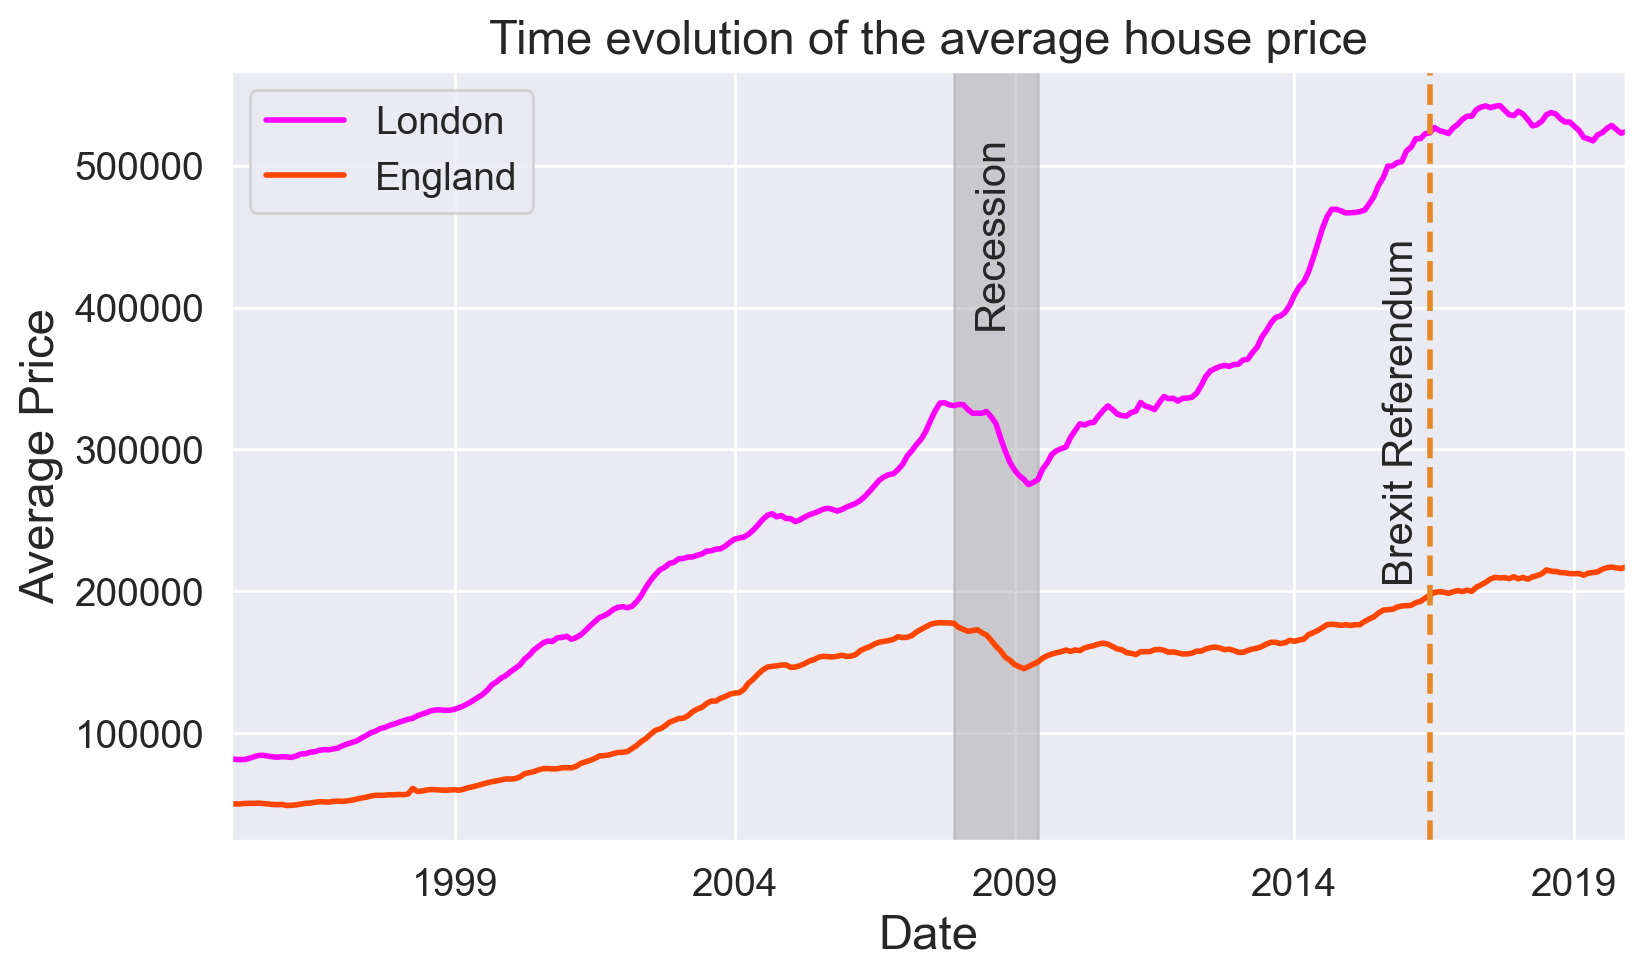

In [46]:
plt.figure(figsize = (9, 5))

lnd_pr.plot(y = 'average_price', color = 'fuchsia', lw = 2, label = 'London')
eng_pr.plot(y = 'average_price', color = 'orangered', lw = 2, label = 'England')

plt.axvspan('2007-12-21', '2009-06-21', alpha = 0.5, color = 'darkgray')
plt.text(x = '2008-04-01', y = 390000, s = 'Recession', rotation = 90, fontsize = font_size-2)
plt.axvline(x = '2016-06-23', lw = 2, color = '#E58826', linestyle = '--')
plt.text(x = '2015-08-01', y = 210000, s = 'Brexit Referendum', rotation = 90, fontsize = font_size-2)

plt.title('Time evolution of the average house price', size = font_size)
plt.ylabel('Average Price', size = font_size)
plt.xticks(size = font_size - 3)
plt.xlabel('Date', size = font_size)
plt.yticks(size = font_size - 3)
plt.legend(fontsize = font_size - 3);

In [ ]:
In overall, the averace price follows an upward trend during the studied time frame, with London always having a higher average price.
This upward trend was disrupted by the the Great Recession (2007-2009), hence the significant decline starting from 2007. London apparently recovered quickly and the average price increased rapidly until 2016. England followed a similar behaviour but with a moderate rise in the same period.
Arguably, the Brexit referendum had an impact in London housing since the average price hit a plateau after 2016. It seems the the rest of England wasn't affected as much from the referendum.


In [ ]:

The code you provided is used to create a time series plot of average house prices for London (lnd_pr) and England (eng_pr). It also includes annotations for significant events like the recession and the Brexit referendum. Let's break down why, when, how, and where you might use this code:

Code: Creating a Time Series Plot with Annotations

python
Copy code
plt.figure(figsize=(9, 5))

lnd_pr.plot(y='average_price', color='fuchsia', lw=2, label='London')
eng_pr.plot(y='average_price', color='orangered', lw=2, label='England')

plt.axvspan('2007-12-21', '2009-06-21', alpha=0.5, color='darkgray')
plt.text(x='2008-04-01', y=390000, s='Recession', rotation=90, fontsize=font_size-2)
plt.axvline(x='2016-06-23', lw=2, color='#E58826', linestyle='--')
plt.text(x='2015-08-01', y=210000, s='Brexit Referendum', rotation=90, fontsize=font_size-2)

plt.title('Time evolution of the average house price', size=font_size)
plt.ylabel('Average Price', size=font_size)
plt.xticks(size=font_size-3)
plt.xlabel('Date', size=font_size)
plt.yticks(size=font_size-3)
plt.legend(fontsize=font_size-3)
Why:

This code is used to visualize and compare the time evolution of average house prices for London and England. It includes annotations for significant events like the recession and the Brexit referendum to provide context to the data.
When:

You would use this code when you want to create a time series plot to visualize and analyze trends in your data over time, and you want to highlight specific events or periods of interest.
How:

The code uses Matplotlib to create a figure and plot two time series (London and England average house prices) using lnd_pr and eng_pr data. Annotations for the recession and Brexit referendum are added using plt.axvspan() and plt.axvline(), respectively. Text labels are added using plt.text(). Various plot formatting options are set, such as titles, labels, and legend.
Where:

You can place this code in your data visualization section, typically after you have calculated the necessary time series data (lnd_pr and eng_pr) and when you want to create a visual representation of the data with annotations.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and processed your time series data lnd_pr and eng_pr
# Also, assuming you've defined font_size as mentioned earlier

# Create and display the time series plot with annotations
plt.figure(figsize=(9, 5))
# ... (the rest of the code)

# Show the plot
plt.show()
This code would generate and display a time series plot with annotations to highlight important events in the data.

In [47]:
@gif.frame
def plot(df_lnd, df_eng, date):
    
    ### select a sub-dataframe from the start until date ###
    d_ln = df_lnd.loc[df_lnd.index[0]:date]
    d_eng = df_eng.loc[df_eng.index[0]:date]
    
    fig = plt.figure(figsize = (9, 5))
    plt.xlim(pd.Timestamp('1994-12-01'), pd.Timestamp('2020-01-01'))
    plt.ylim(47000, 550000)
    
    ### for the vertical orange rectangle and the vertical dashed line ###
    if (date > pd.Timestamp('2007-12-22') and date < pd.Timestamp('2009-06-21')):
        plt.axvspan(pd.Timestamp('2007-12-21'), date, alpha = 0.5, color = 'darkgray') 
    elif (date > pd.Timestamp('2009-06-21')):
        plt.axvspan(pd.Timestamp('2007-12-21'), pd.Timestamp('2009-06-21'), alpha = 0.5, color = 'darkgray')
        plt.text(x = pd.Timestamp('2008-04-29'), y = 390000, s = 'Recession', rotation = 90, fontsize = font_size-2)
    if (date > pd.Timestamp('2016-06-23')):
        plt.axvline(x = pd.Timestamp('2016-06-23'), lw = 2, color = '#E57715', linestyle = '--')
        plt.text(x = pd.Timestamp('2015-08-01'), y = 210000, s = 'Brexit Referendum', rotation = 90, fontsize = font_size-2)
    ############################################################################################################
    
    plt.plot(d_ln, color = 'fuchsia', lw = 2, label = 'London')
    plt.plot(d_eng, color = 'orangered', lw = 2, label = 'England')
    
    plt.title('Time evolution of the average house price', size = font_size)
    plt.ylabel('Average Price', size = font_size)
    plt.xticks(size = font_size - 3)
    plt.xlabel('Date', size = font_size)
    plt.yticks(size = font_size - 3)
    plt.legend(loc = 2, fontsize = font_size - 3);

In [ ]:
The code you provided defines a function decorated with @gif.frame that generates a frame for creating an animated GIF. This function is used for plotting time series data of average house prices for London and England with specific annotations for events like the recession and the Brexit referendum. Let's break down why, when, how, and where you might use this code:

Code: Creating Animated GIF Frames for Time Series Plot

python
Copy code
@gif.frame
def plot(df_lnd, df_eng, date):
    # ... (code for generating the plot and annotations)
Why:

This code defines a function for generating a frame of a time series plot with annotations. The function is decorated with @gif.frame, indicating that it will be used to create frames for an animated GIF. It's used when you want to create an animated visualization of your time series data, highlighting specific events over time.
When:

You would use this code when you have time series data and want to create an animated GIF to visualize how specific events or trends evolve over time.
How:

The function plot takes three arguments: df_lnd (time series data for London), df_eng (time series data for England), and date (the date up to which the plot should be generated). Within the function, you create a plot with annotations based on the provided data and date.
Where:

You typically define this function in your Python script or Jupyter Notebook before using it to generate frames for an animated GIF. You can then use the imageio library to create the GIF by calling this function with different dates to capture different frames.
Here's an example of how you might use this function to generate frames for an animated GIF:

python
Copy code
import gif

# Assuming you've defined the function plot as shown
# Also, make sure you have loaded and processed your time series data (df_lnd and df_eng) and defined the font_size

# Create a list of dates for which you want to generate frames
dates_for_frames = [pd.Timestamp('2000-01-01'), pd.Timestamp('2005-01-01'), pd.Timestamp('2010-01-01')]

# Create an animated GIF by capturing frames with different dates
frames = []
for date in dates_for_frames:
    frame = plot(df_lnd, df_eng, date)
    frames.append(frame)

# Save the animated GIF using imageio
gif.save(frames, 'house_price_animation.gif', duration=1)
This code captures frames for the animated GIF by calling the plot function with different dates and then saves the animation as 'house_price_animation.gif'.






In [50]:
import gif

# Define the frames using your data
frames = []
for months in pd.date_range(start=lnd_pr.index[0], end=lnd_pr.index[-1], freq='3MS'): 
    frame = plot(lnd_pr, eng_pr, months)
    frames.append(frame)

# Save the frames as a GIF
gif.save(frames, 'Price-Lnd_vs_Eng.gif', duration=100)  # Duration in milliseconds


In [ ]:

The code you provided is using the gif library to create an animated GIF by generating frames of a time series plot comparing the average house prices for London and England (lnd_pr and eng_pr). It iterates through different months and captures frames at a 3-month interval to create the animation. Here's an explanation of why, when, how, and where you might use this code:

Code: Creating an Animated GIF of Time Series Data

python
Copy code
import gif

# Define the frames using your data
frames = []
for months in pd.date_range(start=lnd_pr.index[0], end=lnd_pr.index[-1], freq='3MS'): 
    frame = plot(lnd_pr, eng_pr, months)
    frames.append(frame)

# Save the frames as a GIF
gif.save(frames, 'Price-Lnd_vs_Eng.gif', duration=100)  # Duration in milliseconds
Why:

This code is used to create an animated GIF that visualizes the time series data of average house prices for London and England. It allows you to see how these prices change over time in an animated format.
When:

You would use this code when you want to create a dynamic visualization to illustrate trends or changes in your time series data over time. Animated GIFs can be useful for conveying temporal information.
How:

The code uses the gif library to create and save an animated GIF. It iterates through different months using the pd.date_range function and captures frames by calling the plot function with varying dates. The frames are stored in the frames list.
Where:

You typically place this code in a script or Jupyter Notebook where you have already defined the plot function and loaded your time series data (lnd_pr and eng_pr). You specify the output filename and duration (in milliseconds) for the animated GIF.
After running this code, you will generate an animated GIF (Price-Lnd_vs_Eng.gif) that shows how the average house prices for London and England evolve over time in an animated format. You can share or embed this GIF in presentations or reports to communicate your findings effectively.

In [51]:
HTML('<img src="./Price-Lnd_vs_Eng.gif" />')

In [ ]:

The average price in each borough fluctuates through time. However, we can calculate its mean which can give us a rough indication of how expensive each area is.

In [ ]:
The code you provided uses the HTML <img> tag to display an image, specifically the animated GIF you previously created (Price-Lnd_vs_Eng.gif). Here's an explanation of why, when, how, and where you might use this code:

Code: Embedding an Image in HTML

python
Copy code
HTML('<img src="./Price-Lnd_vs_Eng.gif" />')
Why:

This code is used to embed and display an image (in this case, an animated GIF) within an HTML context. It's often used when you want to include visual elements, such as images or animations, in web pages, Jupyter Notebook outputs, or HTML-based presentations.
When:

You would use this code when you want to showcase the animated GIF (Price-Lnd_vs_Eng.gif) you generated in your Jupyter Notebook or when generating HTML-based content for a website or presentation.
How:

The code uses the HTML <img> tag, which is an HTML element used to display images. The src attribute specifies the source file (in this case, "./Price-Lnd_vs_Eng.gif"), and the image will be loaded and displayed in the location where this HTML code is placed.
Where:

You can place this code in a Markdown cell of your Jupyter Notebook or within an HTML document or web page where you want to display the animated GIF. When you run the cell or view the HTML document, the image will be displayed at that location.
Here's an example of how you might use this code in a Jupyter Notebook:

python
Copy code
from IPython.display import HTML

# ... (other code, including the generation of the animated GIF)

# Embed and display the animated GIF in a Markdown cell
HTML('<img src="./Price-Lnd_vs_Eng.gif" />')
When you run this code in a Markdown cell, it will display the animated GIF in your Jupyter Notebook output, allowing you to visualize and share your animated data visualization.

In [52]:
lnd_b_prices = lnd.groupby('area')['average_price'].mean()
lnd_top10_pr = lnd_b_prices.sort_values(ascending = False).to_frame()

print ('\nThe 10 most expensive boroughs in London are:')
lnd_top10_pr.head(10)


The 10 most expensive boroughs in London are:


,average_price
area,
kensington and chelsea,740606.68
westminster,542282.06
camden,466358.25
hammersmith and fulham,442773.38
city of london,422771.36
richmond upon thames,381640.97
islington,364160.28
wandsworth,341411.03
barnet,304272.12


In [ ]:
The code you provided calculates the average property prices for London boroughs (lnd) and then identifies and prints the 10 most expensive boroughs in London. Let's break down why, when, how, and where you might use this code:

Code: Identifying the 10 Most Expensive Boroughs in London

python
Copy code
lnd_b_prices = lnd.groupby('area')['average_price'].mean()
lnd_top10_pr = lnd_b_prices.sort_values(ascending=False).to_frame()

print('\nThe 10 most expensive boroughs in London are:')
lnd_top10_pr.head(10)
Why:

This code is used to determine and display the 10 boroughs in London with the highest average property prices. It's helpful when you want to identify and highlight the most expensive areas in your dataset.
When:

You would use this code when you are conducting a real estate analysis or when you need to provide insights into property prices in London. It's often used for reporting or data exploration.
How:

The code first calculates the mean average price for each London borough using lnd.groupby('area')['average_price'].mean(). It then sorts these values in descending order to find the most expensive boroughs and stores the result in lnd_top10_pr. Finally, it prints the top 10 most expensive boroughs.
Where:

You can place this code in your data analysis or reporting section, typically after you have loaded and processed the data (lnd DataFrame). It's used to provide insights into the high-priced areas within London.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and processed your 'lnd' DataFrame containing London borough data

# Calculate and print the 10 most expensive boroughs in London
lnd_b_prices = lnd.groupby('area')['average_price'].mean()
lnd_top10_pr = lnd_b_prices.sort_values(ascending=False).to_frame()

print('\nThe 10 most expensive boroughs in London are:')
print(lnd_top10_pr.head(10))
This code will display the top 10 most expensive boroughs in London based on the mean average property prices.






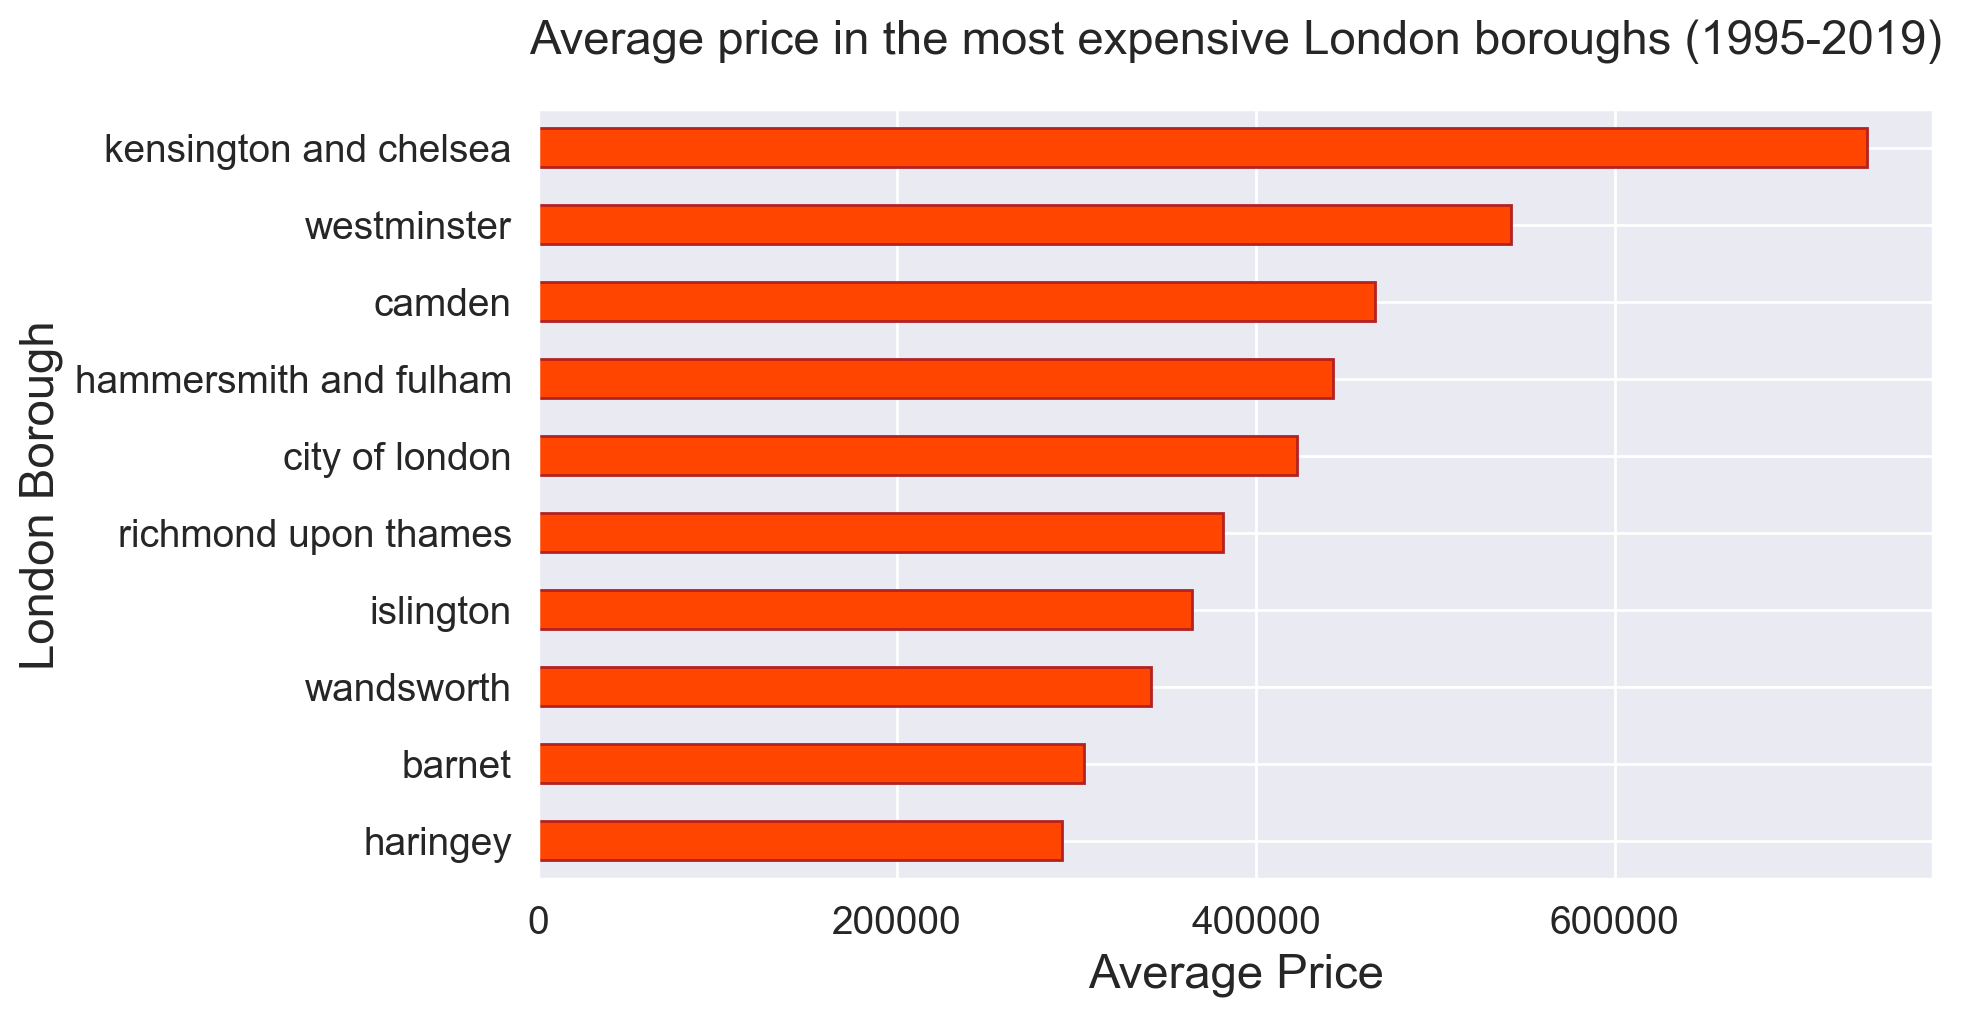

In [53]:

lnd_top10_pr.head(10).sort_values(by = 'average_price', ascending = True).plot(kind = 'barh', figsize = (9, 5), 
                                                                               color = 'orangered', edgecolor = 'firebrick',
                                                                               legend = False)

plt.title('Average price in the most expensive London boroughs (1995-2019)', size = font_size, y = 1.05)
plt.ylabel('London Borough', size = font_size)
plt.yticks(size = font_size - 3)
plt.xlabel('Average Price', size = font_size)
plt.xticks([0, 200_000, 400_000, 600_000], size = font_size - 3);

In [ ]:
We focus on the 5 most expensive boroughs and see the evolution of the average price through time:



In [ ]:
The code you provided creates a horizontal bar chart to visualize the average property prices in the top 10 most expensive London boroughs. Let's break down why, when, how, and where you might use this code:

Code: Creating a Horizontal Bar Chart for the Most Expensive London Boroughs

python
Copy code
lnd_top10_pr.head(10).sort_values(by='average_price', ascending=True).plot(kind='barh', figsize=(9, 5), 
                                                                       color='orangered', edgecolor='firebrick',
                                                                       legend=False)

plt.title('Average price in the most expensive London boroughs (1995-2019)', size=font_size, y=1.05)
plt.ylabel('London Borough', size=font_size)
plt.yticks(size=font_size - 3)
plt.xlabel('Average Price', size=font_size)
plt.xticks([0, 200_000, 400_000, 600_000], size=font_size - 3)
Why:

This code is used to create a visual representation (bar chart) of the average property prices in the top 10 most expensive London boroughs. It's helpful when you want to convey information about property prices in these boroughs in a clear and understandable way.
When:

You would use this code when you want to visualize and communicate data about the most expensive London boroughs, typically as part of a data analysis or presentation.
How:

The code uses Matplotlib to create a horizontal bar chart (kind='barh') based on the data in the lnd_top10_pr DataFrame. It specifies the figure size, bar colors, edge colors, and other formatting options. The title, labels, and tick marks are also customized for clarity.
Where:

You can place this code in your data visualization section, typically after you have calculated the top 10 most expensive boroughs (lnd_top10_pr). It's used to create a visual representation of the data for better understanding and presentation.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already calculated lnd_top10_pr and defined font_size as mentioned earlier

# Create and display the horizontal bar chart
lnd_top10_pr.head(10).sort_values(by='average_price', ascending=True).plot(kind='barh', figsize=(9, 5), 
                                                                       color='orangered', edgecolor='firebrick',
                                                                       legend=False)

plt.title('Average price in the most expensive London boroughs (1995-2019)', size=font_size, y=1.05)
plt.ylabel('London Borough', size=font_size)
plt.yticks(size=font_size - 3)
plt.xlabel('Average Price', size=font_size)
plt.xticks([0, 200_000, 400_000, 600_000], size=font_size - 3)
plt.show()
This code will generate and display the horizontal bar chart showing the average property prices in the top 10 most expensive London boroughs.

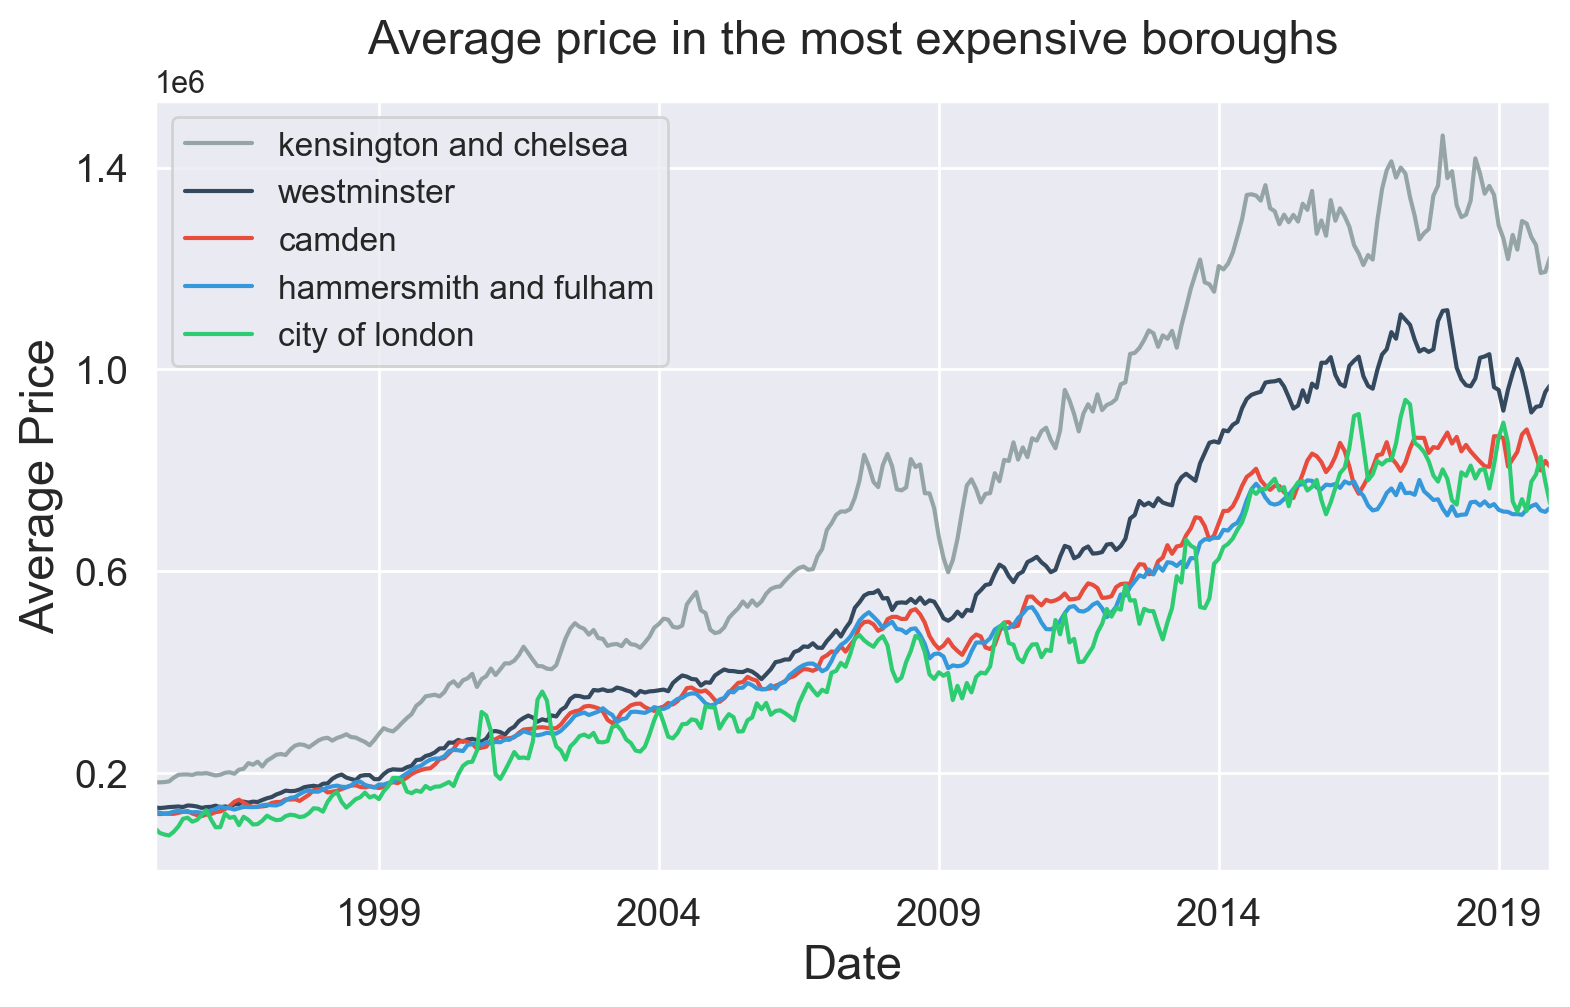

In [54]:
top5_indeces = lnd_top10_pr.head().index
colors = ['#95a5a6', '#34495e', '#e74c3c', '#3498db', '#2ecc71']

plt.figure(figsize = (9, 5))

for index, i in enumerate(top5_indeces):
    df_ = lnd[lnd['area'] == i]
    df_ = df_.groupby('date')['average_price'].mean()
    
    df_.plot(y = 'average_price', label = i, color = colors[index])
       
plt.title('Average price in the most expensive boroughs', y = 1.04, size = font_size)
plt.xlabel('Date', size = font_size)
plt.xticks(size = font_size - 3)
plt.ylabel('Average Price', size = font_size)
plt.yticks([0.2*1E+6, 0.6*1E+6, 1.0*1E+6, 1.4*1E+6], size = font_size - 3)
plt.legend(fontsize = font_size - 5);

In [ ]:
Kensington and Chelsea is the most expensive borough in London between 1995 and 2019. We can read in wikipedia that it holds royal status and it includes many affluent areas, hence the increased price.
Westminister, which is adjacent to Kensighton, comes second. Again this is not a surpise since it is the location of the national government and includes many sites commonly associated with London (e.g. the Buckingham Palace, the Houses of Parliament, 10 Downing Street, and Trafalgar Square) (Source).
We can perform a similar analysis for England:

In [ ]:
The code you provided creates a line plot to visualize the average property prices over time for the top 5 most expensive London boroughs. Each borough is represented by a different color. Let's break down why, when, how, and where you might use this code:

Code: Creating a Line Plot for the Most Expensive London Boroughs Over Time

python
Copy code
top5_indeces = lnd_top10_pr.head().index
colors = ['#95a5a6', '#34495e', '#e74c3c', '#3498db', '#2ecc71']

plt.figure(figsize=(9, 5))

for index, i in enumerate(top5_indeces):
    df_ = lnd[lnd['area'] == i]
    df_ = df_.groupby('date')['average_price'].mean()
    
    df_.plot(y='average_price', label=i, color=colors[index])
       
plt.title('Average price in the most expensive boroughs', y=1.04, size=font_size)
plt.xlabel('Date', size=font_size)
plt.xticks(size=font_size - 3)
plt.ylabel('Average Price', size=font_size)
plt.yticks([0.2*1E+6, 0.6*1E+6, 1.0*1E+6, 1.4*1E+6], size=font_size - 3)
plt.legend(fontsize=font_size - 5)
Why:

This code is used to create a visual representation (line plot) of the average property prices over time for the top 5 most expensive London boroughs. It allows you to compare the price trends for these boroughs.
When:

You would use this code when you want to analyze and visualize the temporal trends in property prices for specific boroughs within London, particularly the most expensive ones. This can provide insights into how property values have changed over time.
How:

The code iterates through the top 5 most expensive boroughs (identified by top5_indeces) and filters the lnd DataFrame to select data for each borough. It then calculates the mean average price over time for each borough and plots the data as separate lines using different colors.
Where:

You can place this code in your data visualization section, typically after you have calculated the top 5 most expensive boroughs (top5_indeces) and loaded the relevant data (lnd DataFrame). It's used to create a visual representation of price trends for these boroughs.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already calculated top5_indeces, defined colors, and loaded the 'lnd' DataFrame
# Also, assuming you have defined font_size as mentioned earlier

# Create and display the line plot for the most expensive boroughs
top5_indeces = lnd_top10_pr.head().index
colors = ['#95a5a6', '#34495e', '#e74c3c', '#3498db', '#2ecc71']

plt.figure(figsize=(9, 5))

for index, i in enumerate(top5_indeces):
    df_ = lnd[lnd['area'] == i]
    df_ = df_.groupby('date')['average_price'].mean()
    
    df_.plot(y='average_price', label=i, color=colors[index])
       
plt.title('Average price in the most expensive boroughs', y=1.04, size=font_size)
plt.xlabel('Date', size=font_size)
plt.xticks(size=font_size - 3)
plt.ylabel('Average Price', size=font_size)
plt.yticks([0.2*1E+6, 0.6*1E+6, 1.0*1E+6, 1.4*1E+6], size=font_size - 3)
plt.legend(fontsize=font_size - 5)
plt.show()
This code will generate and display the line plot showing the average property prices over time for the top 5 most expensive London boroughs.






In [55]:
eng_prices = eng.groupby('area')['average_price'].mean()
eng_top3_pr = eng_prices.sort_values(ascending = False).to_frame()

print('The top 3 most expensive regions in England are:')
eng_top3_pr.head(3)

The top 3 most expensive regions in England are:


,average_price
area,
south east,195653.01
east of england,170796.17
south west,163050.03


In [ ]:
The code you provided calculates the average property prices for English regions (eng) and then identifies and prints the top 3 most expensive regions in England based on these prices. Let's break down why, when, how, and where you might use this code:

Code: Identifying the Top 3 Most Expensive Regions in England

python
Copy code
eng_prices = eng.groupby('area')['average_price'].mean()
eng_top3_pr = eng_prices.sort_values(ascending=False).to_frame()

print('The top 3 most expensive regions in England are:')
eng_top3_pr.head(3)
Why:

This code is used to determine and display the top 3 regions in England with the highest average property prices. It's helpful when you want to identify and highlight the most expensive regions in your dataset.
When:

You would use this code when you are conducting a real estate analysis or when you need to provide insights into property prices in English regions. It's often used for reporting or data exploration.
How:

The code first calculates the mean average price for each English region using eng.groupby('area')['average_price'].mean(). It then sorts these values in descending order to find the most expensive regions and stores the result in eng_top3_pr. Finally, it prints the top 3 most expensive regions.
Where:

You can place this code in your data analysis or reporting section, typically after you have loaded and processed the data (eng DataFrame). It's used to provide insights into the high-priced regions within England.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and processed your 'eng' DataFrame containing English region data

# Calculate and print the top 3 most expensive regions in England
eng_prices = eng.groupby('area')['average_price'].mean()
eng_top3_pr = eng_prices.sort_values(ascending=False).to_frame()

print('The top 3 most expensive regions in England are:')
print(eng_top3_pr.head(3))
This code will display the top 3 most expensive regions in England based on the mean average property prices.






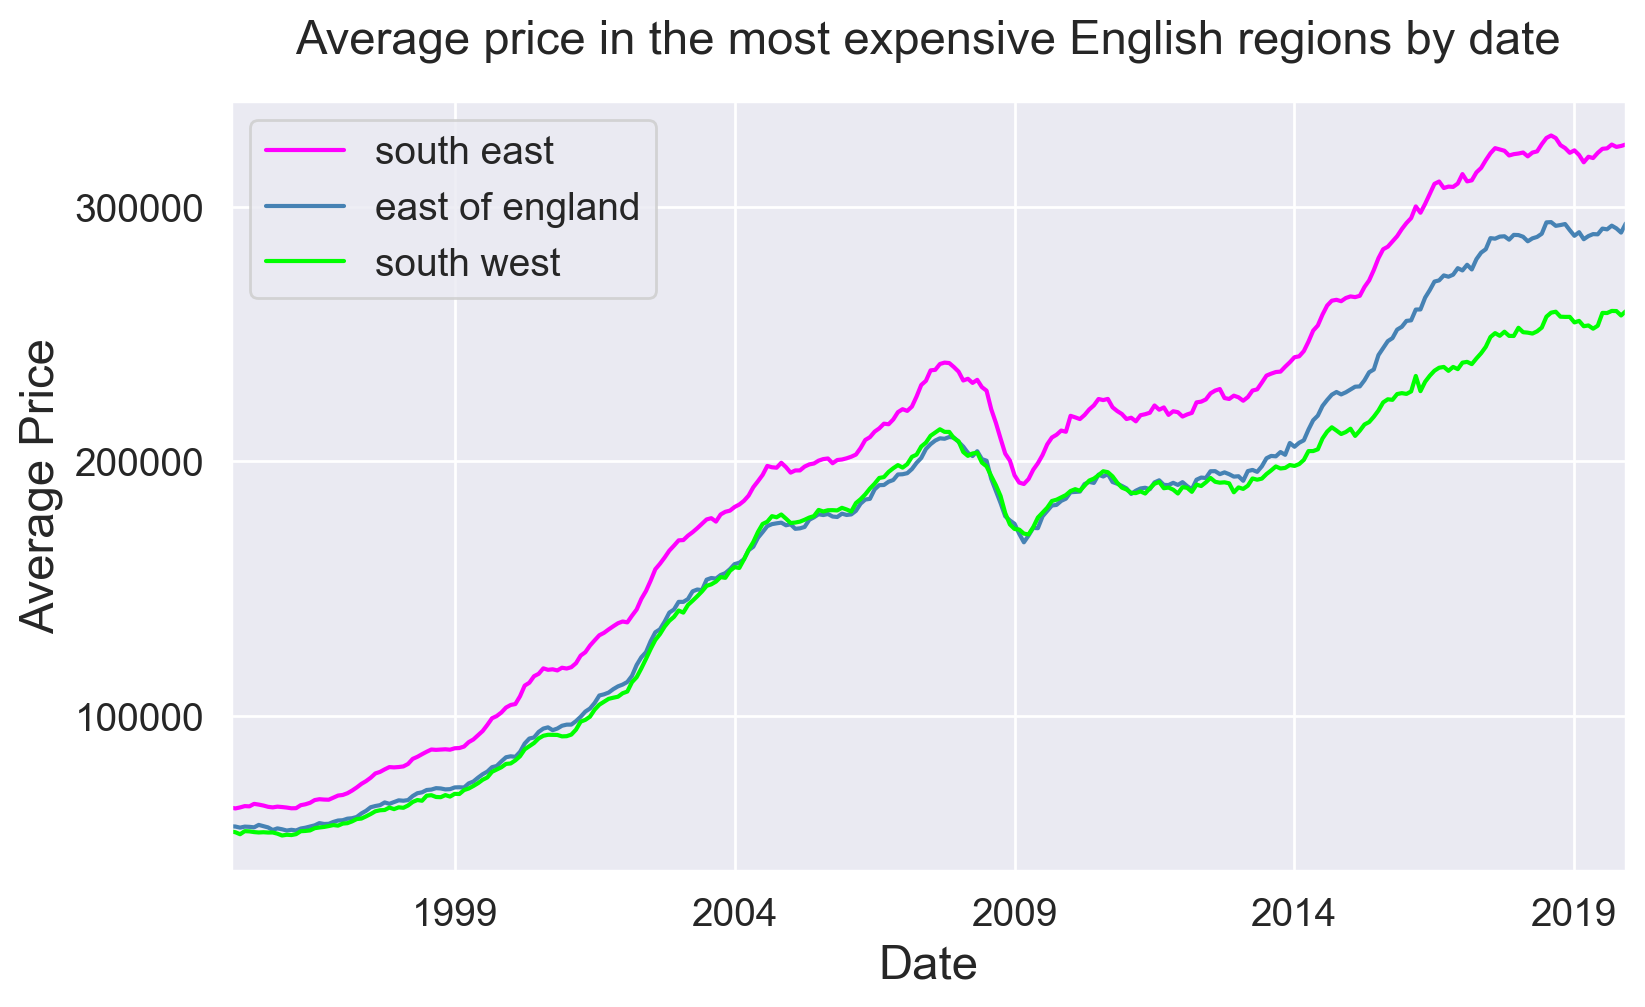

In [56]:
top3_indeces = eng_top3_pr.head(3).index
colors = ['fuchsia', 'steelblue', 'lime', ]

plt.figure(figsize = (9, 5))

for index, i in enumerate(top3_indeces):
    df_ = eng[eng['area'] == i]
    df_ = df_.groupby('date')['average_price'].mean()
    df_.plot(y = 'average_price', label = i, color = colors[index])

plt.title('Average price in the most expensive English regions by date', size = font_size, y = 1.04)
plt.xlabel('Date', size = font_size)
plt.xticks(size = font_size - 3)
plt.ylabel('Average Price', size = font_size)
plt.yticks([100_000, 200_000, 300_000], size = font_size - 3)
plt.legend(fontsize = font_size - 3);

In [ ]:
The three most expensive English regions are all located in the South of England (two of them border London). It would be interesting to plot the same graph but with the cheapest borough of London (which we can find is Barking and Dagenham):

In [ ]:
The code you provided creates a line plot to visualize the average property prices over time for the top 3 most expensive English regions. Each region is represented by a different color. Let's break down why, when, how, and where you might use this code:

Code: Creating a Line Plot for the Most Expensive English Regions Over Time

python
Copy code
top3_indeces = eng_top3_pr.head(3).index
colors = ['fuchsia', 'steelblue', 'lime']

plt.figure(figsize=(9, 5))

for index, i in enumerate(top3_indeces):
    df_ = eng[eng['area'] == i]
    df_ = df_.groupby('date')['average_price'].mean()
    df_.plot(y='average_price', label=i, color=colors[index])

plt.title('Average price in the most expensive English regions by date', size=font_size, y=1.04)
plt.xlabel('Date', size=font_size)
plt.xticks(size=font_size - 3)
plt.ylabel('Average Price', size=font_size)
plt.yticks([100_000, 200_000, 300_000], size=font_size - 3)
plt.legend(fontsize=font_size - 3)
Why:

This code is used to create a visual representation (line plot) of the average property prices over time for the top 3 most expensive English regions. It allows you to compare the price trends for these regions.
When:

You would use this code when you want to analyze and visualize the temporal trends in property prices for specific regions within England, particularly the most expensive ones. This can provide insights into how property values have changed over time.
How:

The code iterates through the top 3 most expensive English regions (identified by top3_indeces) and filters the eng DataFrame to select data for each region. It then calculates the mean average price over time for each region and plots the data as separate lines using different colors.
Where:

You can place this code in your data visualization section, typically after you have calculated the top 3 most expensive regions (top3_indeces) and loaded the relevant data (eng DataFrame). It's used to create a visual representation of price trends for these regions.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already calculated top3_indeces, defined colors, and loaded the 'eng' DataFrame
# Also, assuming you have defined font_size as mentioned earlier

# Create and display the line plot for the most expensive English regions
top3_indeces = eng_top3_pr.head(3).index
colors = ['fuchsia', 'steelblue', 'lime']

plt.figure(figsize=(9, 5))

for index, i in enumerate(top3_indeces):
    df_ = eng[eng['area'] == i]
    df_ = df_.groupby('date')['average_price'].mean()
    df_.plot(y='average_price', label=i, color=colors[index])

plt.title('Average price in the most expensive English regions by date', size=font_size, y=1.04)
plt.xlabel('Date', size=font_size)
plt.xticks(size=font_size - 3)
plt.ylabel('Average Price', size=font_size)
plt.yticks([100_000, 200_000, 300_000], size=font_size - 3)
plt.legend(fontsize=font_size - 3)
plt.show()
This code will generate and display the line plot showing the average property prices over time for the top 3 most expensive English regions.

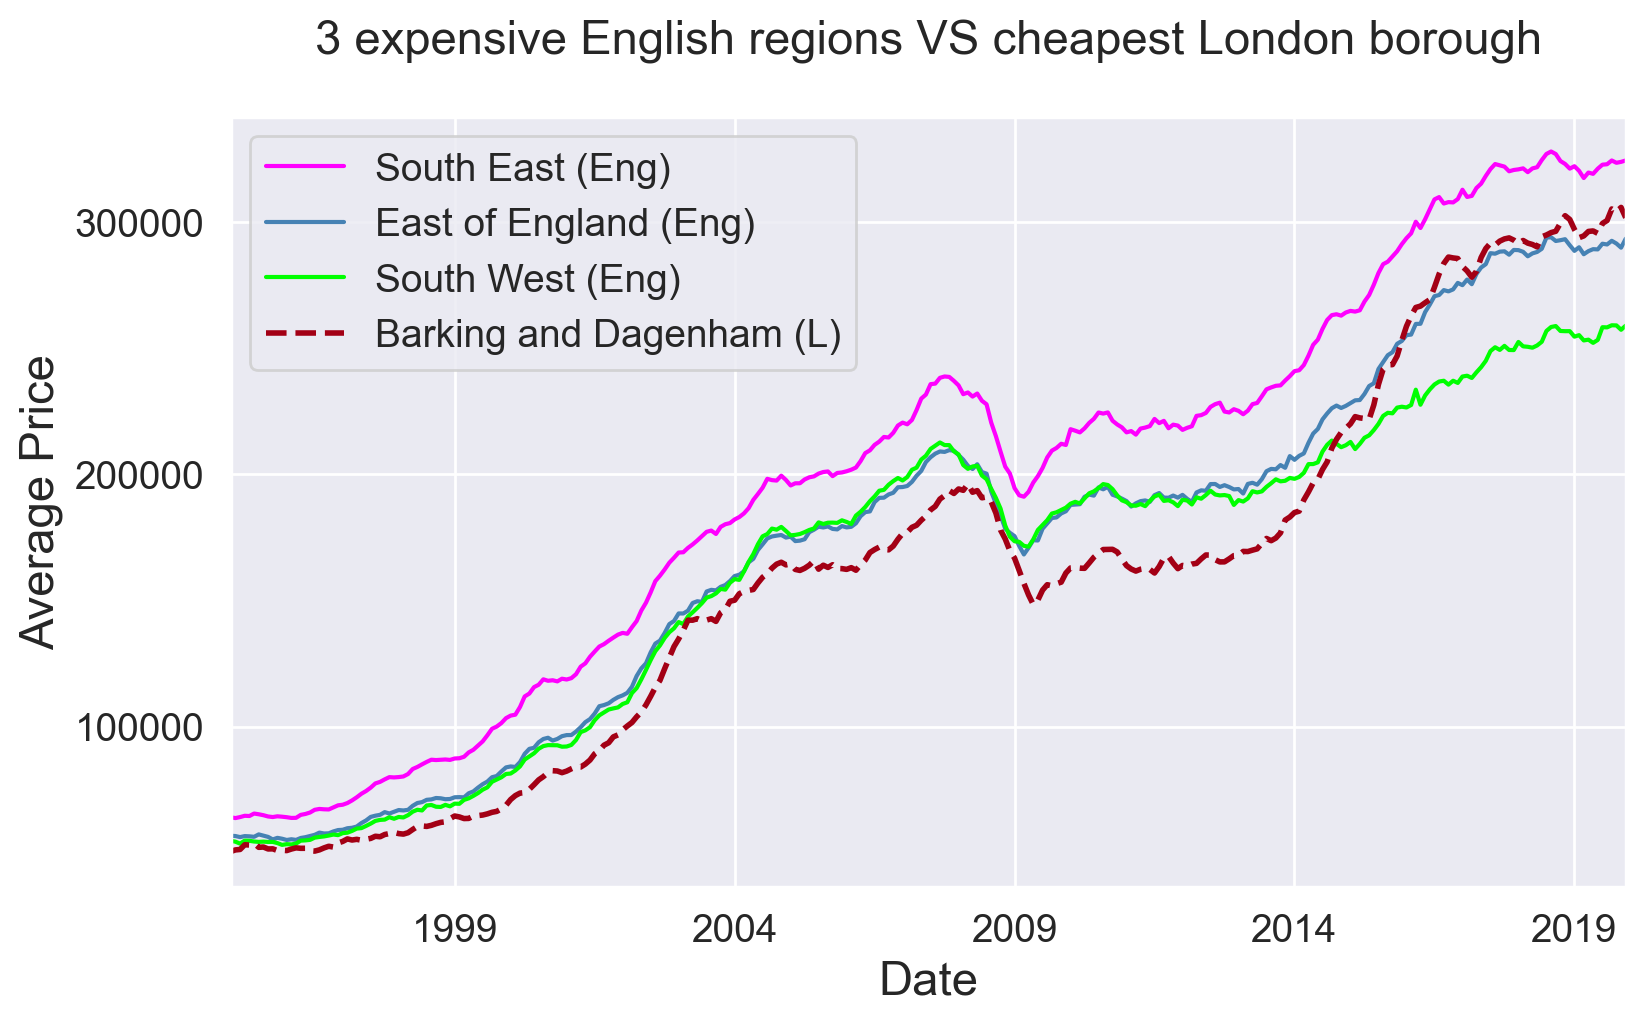

In [57]:
plt.figure(figsize = (9, 5))

for index, i in enumerate(top3_indeces):
    df_ = eng[eng['area'] == i]
    df_ = df_.groupby('date')['average_price'].mean()
    df_.plot(y = 'average_price', label = i, color = colors[index])

lnd_bng_pr = lnd[lnd['area'] == 'barking and dagenham'].groupby('date')['average_price'].mean()
lnd_bng_pr.plot(y = 'average_price', lw = 2, linestyle = '--', color = '#A30015', label = 'barking and dagenham')

plt.title('3 expensive English regions VS cheapest London borough', size = font_size, y = 1.06)
plt.xlabel('Date', size = font_size)
plt.xticks(size = font_size - 3)
plt.ylabel('Average Price', size = font_size)
plt.yticks([0.1*1E+6, 0.2*1E+6, 0.3*1E+6], size = font_size - 3)
plt.legend(labels = ['South East (Eng)', 'East of England (Eng)', 'South West (Eng)', 'Barking and Dagenham (L)'], 
           fontsize = font_size - 3);

In [ ]:
The code you provided creates a line plot to visualize the average property prices over time for the top 3 most expensive English regions (South East, East of England, South West) and compares them to the cheapest London borough (Barking and Dagenham). Let's break down why, when, how, and where you might use this code:

Code: Creating a Line Plot Comparing Expensive English Regions to Cheapest London Borough

python
Copy code
plt.figure(figsize=(9, 5))

for index, i in enumerate(top3_indeces):
    df_ = eng[eng['area'] == i]
    df_ = df_.groupby('date')['average_price'].mean()
    df_.plot(y='average_price', label=i, color=colors[index])

lnd_bng_pr = lnd[lnd['area'] == 'barking and dagenham'].groupby('date')['average_price'].mean()
lnd_bng_pr.plot(y='average_price', lw=2, linestyle='--', color='#A30015', label='barking and dagenham')

plt.title('3 expensive English regions VS cheapest London borough', size=font_size, y=1.06)
plt.xlabel('Date', size=font_size)
plt.xticks(size=font_size - 3)
plt.ylabel('Average Price', size=font_size)
plt.yticks([0.1*1E+6, 0.2*1E+6, 0.3*1E+6], size=font_size - 3)
plt.legend(labels=['South East (Eng)', 'East of England (Eng)', 'South West (Eng)', 'Barking and Dagenham (L)'], 
           fontsize=font_size - 3)
Why:

This code is used to create a visual comparison between the average property prices over time for the top 3 most expensive English regions and the cheapest London borough (Barking and Dagenham). It allows you to see how property price trends in these areas differ.
When:

You would use this code when you want to provide insights into the relative affordability of property prices in different regions. This comparison can be valuable for real estate analysis or when you want to highlight disparities in property prices.
How:

The code iterates through the top 3 most expensive English regions (identified by top3_indeces) and filters the eng DataFrame to select data for each region. It calculates the mean average price over time and plots the data as separate lines using different colors. It also adds a dashed line for Barking and Dagenham, the cheapest London borough.
Where:

You can place this code in your data visualization section, typically after you have calculated the top 3 most expensive English regions (top3_indeces) and loaded the relevant data (eng and lnd DataFrames). It's used to create a visual representation that compares property price trends in different areas.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already calculated top3_indeces, defined colors, and loaded the 'eng' and 'lnd' DataFrames
# Also, assuming you have defined font_size as mentioned earlier

# Create and display the line plot comparing expensive English regions to the cheapest London borough
plt.figure(figsize=(9, 5))

for index, i in enumerate(top3_indeces):
    df_ = eng[eng['area'] == i]
    df_ = df_.groupby('date')['average_price'].mean()
    df_.plot(y='average_price', label=i, color=colors[index])

lnd_bng_pr = lnd[lnd['area'] == 'barking and dagenham'].groupby('date')['average_price'].mean()
lnd_bng_pr.plot(y='average_price', lw=2, linestyle='--', color='#A30015', label='barking and dagenham')

plt.title('3 expensive English regions VS cheapest London borough', size=font_size, y=1.06)
plt.xlabel('Date', size=font_size)
plt.xticks(size=font_size - 3)
plt.ylabel('Average Price', size=font_size)
plt.yticks([0.1*1E+6, 0.2*1E+6, 0.3*1E+6], size=font_size - 3)
plt.legend(labels=['South East (Eng)', 'East of England (Eng)', 'South West (Eng)', 'Barking and Dagenham (L)'], 
           fontsize=font_size - 3)
plt.show()
This code will generate and display the line plot comparing property price trends in the expensive English regions to Barking and Dagenham, the cheapest London borough.

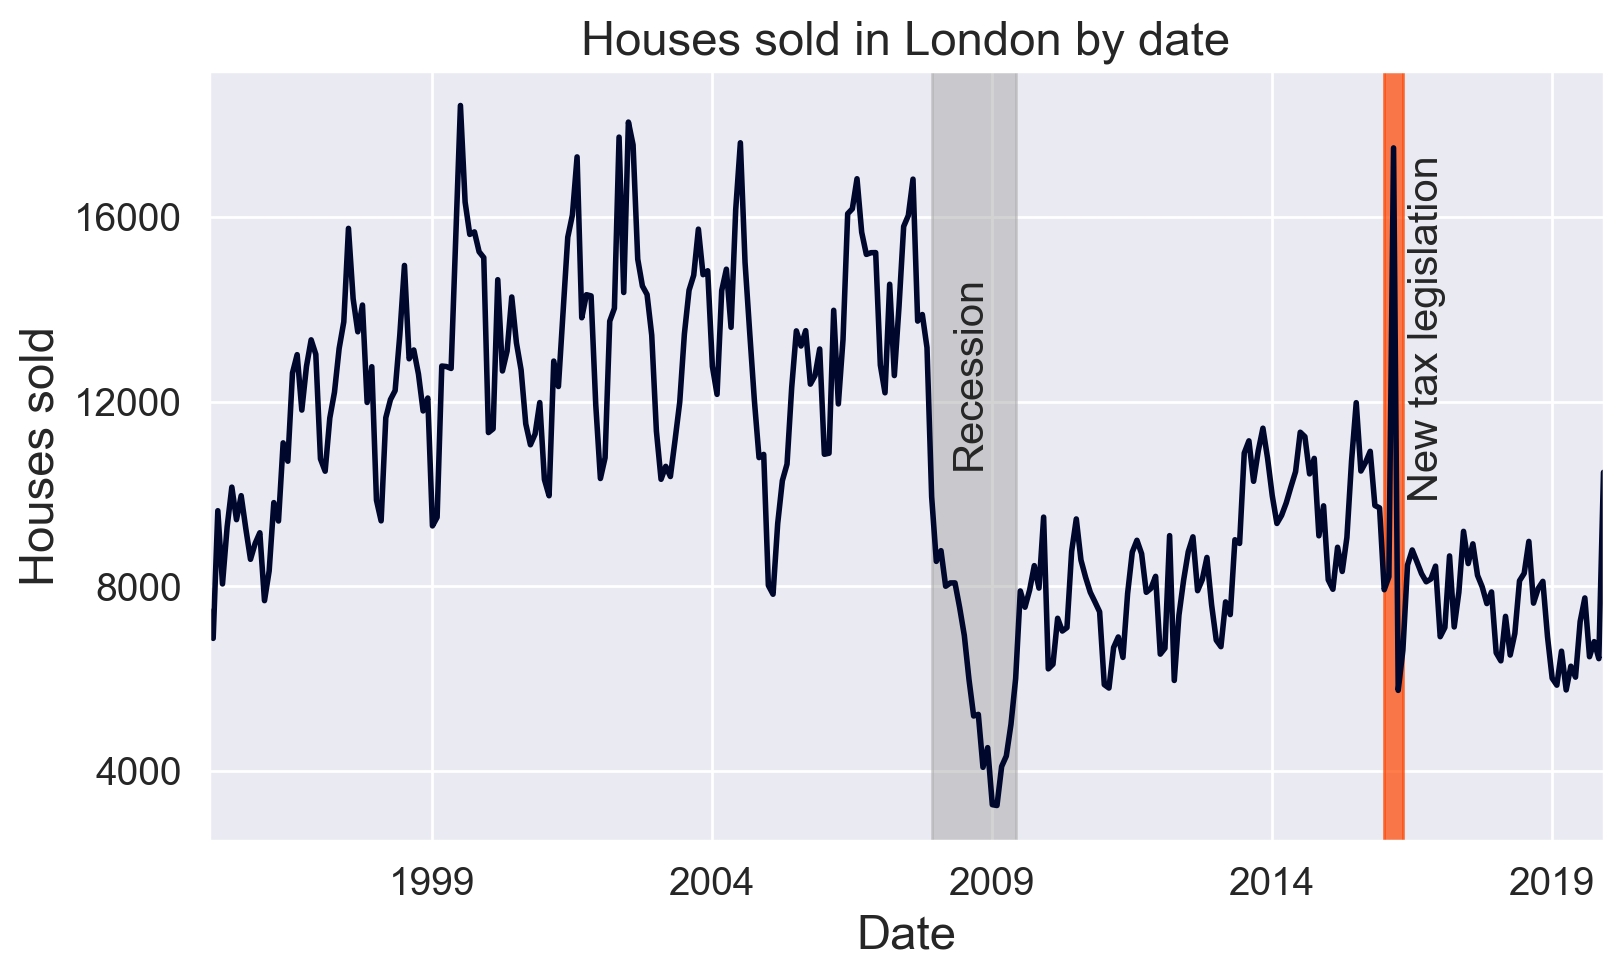

In [58]:
lnd_houses = lnd.groupby('date')['houses_sold'].sum()
lnd_houses.plot(figsize = (9, 5), lw = 2, y = 'houses_sold', color = '#00072D')

plt.axvspan('2007-12-21', '2009-06-21', alpha = 0.5, color = 'darkgray')
plt.text(x = '2008-04-01', y = 10700, s = 'Recession', rotation = 90, fontsize = font_size-2)
plt.axvspan('2016-01-1', '2016-05-01', alpha = 0.7, color = 'orangered')


plt.text(x = '2016-06-01', y = 10000, s = 'New tax legislation', rotation = 90, fontsize = font_size-2)

plt.title('Houses sold in London by date', size = font_size)
plt.xlabel('Date', size = font_size)
plt.xticks(size = font_size - 3)
plt.ylabel('Houses sold', size = font_size)
plt.yticks([4000, 8000, 12000, 16000], size = font_size - 3);

In [ ]:
The number of houses sold in London dropped sharply during the financial recession and it seems that it hasn't completely recovered since,
Interestingly, there is spike in March 2016 which at first sight looks like a artefact. That is not the case, because people were actually trying to avoid a new legislation that came into effect in April 2016 and imposed an increase in the tax bill on buying a second home.
Again, the referendum resulted in a downward trend starting from July 2016.

The boroughs with the highest number of sold houses between 1995 and 2019 are:

In [ ]:
The code you provided creates a line plot to visualize the number of houses sold in London over time. It also includes shaded regions and annotations to highlight significant events or periods. Let's break down why, when, how, and where you might use this code:

Code: Creating a Line Plot for Houses Sold in London Over Time

python
Copy code
lnd_houses = lnd.groupby('date')['houses_sold'].sum()
lnd_houses.plot(figsize=(9, 5), lw=2, y='houses_sold', color='#00072D')

plt.axvspan('2007-12-21', '2009-06-21', alpha=0.5, color='darkgray')
plt.text(x='2008-04-01', y=10700, s='Recession', rotation=90, fontsize=font_size-2)
plt.axvspan('2016-01-1', '2016-05-01', alpha=0.7, color='orangered')
plt.text(x='2016-06-01', y=10000, s='New tax legislation', rotation=90, fontsize=font_size-2)

plt.title('Houses sold in London by date', size=font_size)
plt.xlabel('Date', size=font_size)
plt.xticks(size=font_size - 3)
plt.ylabel('Houses sold', size=font_size)
plt.yticks([4000, 8000, 12000, 16000], size=font_size - 3)
Why:

This code is used to create a visual representation (line plot) of the number of houses sold in London over time. It allows you to observe trends and events that may have affected housing sales in the region.
When:

You would use this code when you want to analyze and visualize the temporal trends in the number of houses sold in London. It's useful for tracking the dynamics of the housing market over time.
How:

The code aggregates the data by grouping it by date and summing the number of houses sold. It then creates a line plot to display this data. Shaded regions and text annotations are added to highlight specific periods, such as the recession and new tax legislation.
Where:

You can place this code in your data visualization section, typically after you have processed the data (lnd DataFrame) and aggregated it to calculate the number of houses sold over time.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and processed your 'lnd' DataFrame containing data on houses sold
# Also, assuming you have defined font_size as mentioned earlier

# Create and display the line plot for houses sold in London over time
lnd_houses = lnd.groupby('date')['houses_sold'].sum()
lnd_houses.plot(figsize=(9, 5), lw=2, y='houses_sold', color='#00072D')

plt.axvspan('2007-12-21', '2009-06-21', alpha=0.5, color='darkgray')
plt.text(x='2008-04-01', y=10700, s='Recession', rotation=90, fontsize=font_size-2)
plt.axvspan('2016-01-1', '2016-05-01', alpha=0.7, color='orangered')
plt.text(x='2016-06-01', y=10000, s='New tax legislation', rotation=90, fontsize=font_size-2)

plt.title('Houses sold in London by date', size=font_size)
plt.xlabel('Date', size=font_size)
plt.xticks(size=font_size - 3)
plt.ylabel('Houses sold', size=font_size)
plt.yticks([4000, 8000, 12000, 16000], size=font_size - 3)
plt.show()
This code will generate and display the line plot showing the number of houses sold in London over time, with highlighted events or periods.






In [59]:
lnd_b_houses = lnd.groupby('area')['houses_sold'].sum()
lnd_top5_h = lnd_b_houses.sort_values(ascending = False).to_frame()
lnd_top5_h.head(5)

,houses_sold
area,
wandsworth,164419.06
bromley,149012.71
croydon,146393.98
barnet,134094.98
lambeth,118347.49


In [ ]:
The code you provided calculates and prints the top 5 London boroughs with the highest total number of houses sold. Let's break down why, when, how, and where you might use this code:

Code: Identifying the Top 5 London Boroughs with the Highest Houses Sold

python
Copy code
lnd_b_houses = lnd.groupby('area')['houses_sold'].sum()
lnd_top5_h = lnd_b_houses.sort_values(ascending=False).to_frame()
lnd_top5_h.head(5)
Why:

This code is used to identify and display the top 5 London boroughs with the highest total number of houses sold. It provides insights into which boroughs have the most active real estate markets in terms of sales.
When:

You would use this code when you want to analyze and report on the performance of different London boroughs in terms of housing sales. It's useful for understanding market trends and identifying areas of high activity.
How:

The code groups the data in the lnd DataFrame by the 'area' (London borough) and calculates the sum of houses sold for each borough using groupby('area')['houses_sold'].sum(). It then sorts the results in descending order to find the boroughs with the highest sales and stores this information in lnd_top5_h. Finally, it prints the top 5 boroughs.
Where:

You can place this code in your data analysis or reporting section, typically after you have loaded and processed the data (lnd DataFrame). It's used to provide insights into the boroughs with the highest housing sales activity.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and processed your 'lnd' DataFrame containing data on houses sold

# Calculate and print the top 5 London boroughs with the highest houses sold
lnd_b_houses = lnd.groupby('area')['houses_sold'].sum()
lnd_top5_h = lnd_b_houses.sort_values(ascending=False).to_frame()
print('The top 5 London boroughs with the highest houses sold:')
print(lnd_top5_h.head(5))
This code will display the top 5 London boroughs with the highest total number of houses sold based on the available data.

In [62]:
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])
df_y = df_y[df_y['area'].isin(lnd_boroughs)] # select only London boroughs

print('This dataset contains {} rows and {} columns.'.format(df_y.shape[0], df_y.shape[1]))
df_y.head()


This dataset contains 693 rows and 12 columns.


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.00,NaN,48922,0,6581.00,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.00,NaN,23620,3,162444.00,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.00,NaN,23128,8,313469.00,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.00,NaN,21386,18,217458.00,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.00,NaN,20911,6,260317.00,NaN,NaN,NaN,1


In [ ]:
The code you provided loads a yearly dataset of variables related to housing in London, filters it to select only London boroughs, and then prints some basic information about the dataset. Let's break down why, when, how, and where you might use this code:

Code: Loading and Filtering a Yearly Dataset for London Boroughs

python
Copy code
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])
df_y = df_y[df_y['area'].isin(lnd_boroughs)]  # Select only London boroughs

print('This dataset contains {} rows and {} columns.'.format(df_y.shape[0], df_y.shape[1]))
df_y.head()
Why:

This code is used to load a dataset containing yearly variables related to housing in London and filter it to include data only for London boroughs. It's helpful when you want to work with yearly data specific to London's boroughs for analysis or reporting.
When:

You would use this code when you need to work with yearly data related to housing in London and focus on London boroughs. It's often used when you want to analyze long-term trends in housing variables for specific regions.
How:

The code first loads the dataset from a CSV file, parsing the 'date' column as dates. It then filters the dataset to include only the rows where the 'area' (London borough) is in the list of lnd_boroughs. Finally, it prints information about the dataset, including the number of rows and columns, and displays the first few rows.
Where:

You can place this code in your data preprocessing or data exploration section, typically after you have defined the list of lnd_boroughs and before you start analyzing or visualizing the yearly housing data for London boroughs.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already defined the list of 'lnd_boroughs' and have the CSV file with yearly housing data

# Load and filter the yearly housing dataset for London boroughs
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])
df_y = df_y[df_y['area'].isin(lnd_boroughs)]

# Print basic information about the dataset and display the first few rows
print('This dataset contains {} rows and {} columns.'.format(df_y.shape[0], df_y.shape[1]))
print(df_y.head())
This code will load and filter the dataset to focus on London boroughs and provide initial insights into the data.





Regenerate


In [63]:
null_df_y = df_y.isnull().sum().sort_values(ascending = False)
percent = (df_y.isnull().sum()/df_y.isnull().count()).sort_values(ascending = False)*100

null_df = pd.concat([null_df_y, percent], axis = 1, keys = ['Counts', '%'])
null_df.head(10)

,Counts,%
life_satisfaction,437,63.06
area_size,99,14.29
no_of_houses,99,14.29
number_of_jobs,66,9.52
recycling_pct,33,4.76
population_size,33,4.76
median_salary,10,1.44
code,0,0.00
area,0,0.00
date,0,0.00


In [ ]:

The code you provided calculates and displays the count and percentage of missing values for each column in the yearly dataset related to housing in London. Let's break down why, when, how, and where you might use this code:

Code: Calculating and Displaying Missing Value Counts and Percentages

python
Copy code
null_df_y = df_y.isnull().sum().sort_values(ascending=False)
percent = (df_y.isnull().sum() / df_y.isnull().count()).sort_values(ascending=False) * 100

null_df = pd.concat([null_df_y, percent], axis=1, keys=['Counts', '%'])
null_df.head(10)
Why:

This code is used to identify and quantify missing values in the yearly housing dataset for London boroughs. It helps you understand which columns have the most missing data, the extent of missingness (percentage), and prioritize data cleaning or imputation tasks.
When:

You would use this code when you're preparing the data for analysis or reporting and need to assess the quality of the dataset. Identifying missing values is a crucial step in data preprocessing.
How:

The code calculates the count of missing values for each column using .isnull().sum() and then sorts these counts in descending order. It also calculates the percentage of missing values by dividing the count of missing values by the total number of rows and multiplying by 100. Finally, it combines these results into a DataFrame (null_df) and displays the top 10 columns with missing values.
Where:

You can place this code in your data preprocessing section, typically after you've loaded and filtered the dataset (df_y). It's used to assess data quality and decide how to handle missing values in the dataset.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and filtered your 'df_y' DataFrame containing yearly housing data

# Calculate and display missing value counts and percentages
null_df_y = df_y.isnull().sum().sort_values(ascending=False)
percent = (df_y.isnull().sum() / df_y.isnull().count()).sort_values(ascending=False) * 100

null_df = pd.concat([null_df_y, percent], axis=1, keys=['Counts', '%'])
print(null_df.head(10))
This code will provide information about the columns with the most missing values and their corresponding percentages. You can use this information to make informed decisions about data cleaning or imputation strategies.

In [64]:
df_y[~df_y['mean_salary'].str.isnumeric()]['mean_salary'].value_counts()


mean_salary
#    7
Name: count, dtype: int64

In [ ]:
The code you provided filters the df_y DataFrame to find non-numeric values in the 'mean_salary' column and then counts the occurrences of each unique non-numeric value. Let's break down why, when, how, and where you might use this code:

Code: Counting Unique Non-Numeric Values in 'mean_salary' Column

python
Copy code
df_y[~df_y['mean_salary'].str.isnumeric()]['mean_salary'].value_counts()
Why:

This code is used to identify and count unique non-numeric values in the 'mean_salary' column of the yearly housing dataset. It helps you understand the nature of non-numeric data entries in this specific column.
When:

You would use this code when you suspect that there might be non-numeric data entries in the 'mean_salary' column, and you want to investigate and count them. This can be part of data quality assessment and cleaning.
How:

The code first checks each entry in the 'mean_salary' column to determine if it is non-numeric using .str.isnumeric(). Entries that are not numeric are selected using ~ (negation). Then, .value_counts() is applied to count the occurrences of each unique non-numeric value.
Where:

You can place this code in your data cleaning and data quality assessment section, typically after you have loaded and filtered the dataset (df_y). It's used to investigate and address any non-numeric data entries in the 'mean_salary' column.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and filtered your 'df_y' DataFrame containing yearly housing data

# Find and count unique non-numeric values in the 'mean_salary' column
non_numeric_salary_counts = df_y[~df_y['mean_salary'].str.isnumeric()]['mean_salary'].value_counts()
print(non_numeric_salary_counts)
This code will display the unique non-numeric values in the 'mean_salary' column and their respective counts. You can use this information to decide how to handle or clean these non-numeric entries, such as converting them to numeric values or dealing with them appropriately in your analysis.

In [65]:
df_y['mean_salary'] = df_y['mean_salary'].replace(['#'], np.NaN)
df_y['mean_salary'] = df_y['mean_salary'].astype(float)

In [ ]:
The code you provided performs two operations on the 'mean_salary' column in the df_y DataFrame. It replaces a specific character ('#') with NaN (Not a Number) and then converts the column to a float data type. Here's a breakdown of why, when, how, and where you might use this code:

Code: Data Cleaning for 'mean_salary' Column

python
Copy code
df_y['mean_salary'] = df_y['mean_salary'].replace(['#'], np.NaN)
df_y['mean_salary'] = df_y['mean_salary'].astype(float)
Why:

This code is used to clean and prepare the 'mean_salary' column in the df_y DataFrame. It replaces a specific character ('#') with NaN to represent missing values and converts the column's data type to float, making it suitable for numerical calculations and analysis.
When:

You would use this code when you've identified non-numeric or special characters in the 'mean_salary' column that need to be addressed. Data cleaning is typically performed as part of data preprocessing before analysis.
How:

The code uses the .replace() method to replace all occurrences of '#' with NaN. The replace(['#'], np.NaN) operation replaces the character '#' with a NaN value. Then, it uses .astype(float) to convert the entire 'mean_salary' column to the float data type.
Where:

You can place this code in your data preprocessing section, usually after loading and filtering the dataset (df_y). It's important to clean and prepare the data for analysis, and this code specifically targets the 'mean_salary' column.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and filtered your 'df_y' DataFrame containing yearly housing data

# Clean and prepare the 'mean_salary' column
df_y['mean_salary'] = df_y['mean_salary'].replace(['#'], np.NaN)
df_y['mean_salary'] = df_y['mean_salary'].astype(float)
This code will replace the '#' characters with NaN and ensure that the 'mean_salary' column contains float values, making it suitable for numerical analysis and calculations.

In [84]:
df_y['year'] = df_y['date'].dt.year

print ('yearly_variables dataset')
print ('\tFirst date: ', df_y['year'].min())
print ('\tFinal date: ', df_y['year'].max())

yearly_variables dataset
	First date:  1999
	Final date:  2019


In [ ]:

The code you provided extracts the year from the 'date' column in the df_y DataFrame, and then it prints the minimum and maximum years found in the dataset. Here's a breakdown of why, when, how, and where you might use this code:

Code: Extracting Year from 'date' Column and Reporting Year Range

python
Copy code
df_y['year'] = df_y['date'].dt.year

print('yearly_variables dataset')
print('\tFirst date: ', df_y['year'].min())
print('\tFinal date: ', df_y['year'].max())
Why:

This code is used to extract the year component from the 'date' column and report the range of years present in the dataset. It helps you understand the time frame covered by the data.
When:

You would use this code when you need to analyze and report on the time range of the data in the df_y DataFrame. Understanding the dataset's temporal coverage is important for interpreting the results correctly.
How:

The code uses the .dt.year accessor to extract the year component from the 'date' column and assigns it to a new 'year' column in the DataFrame. Then, it uses the .min() and .max() functions to find and print the earliest (first date) and latest (final date) years in the dataset.
Where:

You can place this code in your data exploration or data summary section, typically after you have loaded and preprocessed the dataset (df_y). It helps provide context about the dataset's temporal coverage.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and preprocessed your 'df_y' DataFrame containing yearly housing data

# Extract the year from the 'date' column and report the year range
df_y['year'] = df_y['date'].dt.year

print('yearly_variables dataset')
print('\tFirst date: ', df_y['year'].min())
print('\tFinal date: ', df_y['year'].max())
This code will display the first and final years in the dataset, allowing you to understand the dataset's temporal scope.

In [79]:
print(lnd['year'].unique())


[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020]


In [ ]:
The code you provided prints the unique values found in the 'year' column of the lnd DataFrame. Here's a breakdown of why, when, how, and where you might use this code:

Code: Printing Unique Years in the 'year' Column

python
Copy code
print(lnd['year'].unique())
Why:

This code is used to examine and list the unique years present in the 'year' column of the lnd DataFrame. It helps you understand which years' data are available in the dataset.
When:

You would use this code when you want to investigate the specific years for which you have data in the lnd DataFrame. It's often part of data exploration and understanding the temporal distribution of data.
How:

The code accesses the 'year' column using lnd['year'], and then it applies the .unique() method to retrieve and print the unique values (unique years) in that column.
Where:

You can place this code in your data exploration or data summary section, typically after loading and filtering the dataset (lnd). It provides valuable information about the temporal coverage of the data.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and filtered your 'lnd' DataFrame containing data related to London

# Print unique years in the 'year' column
print(lnd['year'].unique())
This code will display a list of unique years present in the 'year' column of the lnd DataFrame, helping you understand the time frame covered by the data.

In [90]:
import os

os.environ['SHAPE_RESTORE_SHX'] = 'YES'
# Now, proceed to open the shapefile using Geopandas or other GIS libraries

In [ ]:

The code you provided sets an environment variable SHAPE_RESTORE_SHX to 'YES'. This environment variable can be used with Geospatial libraries like GeoPandas to enable the automatic restoration of lost .shx files when opening shapefiles. Here's a breakdown of why, when, how, and where you might use this code:

Code: Setting the SHAPE_RESTORE_SHX Environment Variable

python
Copy code
os.environ['SHAPE_RESTORE_SHX'] = 'YES'
Why:

This code sets the SHAPE_RESTORE_SHX environment variable to 'YES', which instructs Geospatial libraries like GeoPandas to attempt to restore lost .shx files when opening shapefiles. .shx files are used for index and fast access to the geometry data in shapefiles, and they can sometimes be lost or missing.
When:

You would use this code when you are working with shapefiles in a Geospatial context and you suspect that some of your shapefiles may have missing .shx files. Enabling this option allows the library to make an effort to restore the missing index information.
How:

The code uses the os.environ dictionary to set an environment variable named SHAPE_RESTORE_SHX to 'YES'. This can be done before opening or reading shapefiles using GeoPandas or other Geospatial libraries.
Where:

You can place this code at the beginning of your Geospatial analysis script or notebook, typically before you open or read any shapefiles. It's used to configure the behavior of the Geospatial library regarding missing .shx files.
Here's an example of how you might use this code when working with GeoPandas:

python
Copy code
import os
import geopandas as gpd

# Set the SHAPE_RESTORE_SHX environment variable
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Now, proceed to open and work with shapefiles using GeoPandas
gdf = gpd.read_file('your_shapefile.shp')
In this example, setting the environment variable ensures that GeoPandas will attempt to restore lost .shx files when opening the shapefile.

In [94]:
pip install geopandas


In [100]:
import geopandas as gpd
import zipfile
import os


DriverError: C:\Users\saura\Downloads\EDA-Project.zip\EDA-Project\London_Wards\Boroughs\London_Borough_Excluding_MHW.shp: No such file or directory

In [105]:
file_path = r"C:\Users\saura\Downloads\EDA-Project_1\EDA-Project\London_Wards\Boroughs\London_Borough_Excluding_MHW.shp"
london_map = gpd.read_file(file_path)

london_map.columns = london_map.columns.str.lower()
london_map.head()

,name,gss_code,hectares,nonld_area,ons_inner,sub_2009,sub_2006,geometry
0,Kingston upon Thames,E09000021,3726.12,0.00,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.44,0.00,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.49,0.00,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.54,60.76,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.43,0.00,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [ ]:
The code you provided reads a shapefile representing London boroughs using GeoPandas, converts the column names to lowercase, and displays the first few rows of the resulting GeoDataFrame (london_map). Here's a breakdown of why, when, how, and where you might use this code:

Code: Reading a Shapefile, Lowercasing Column Names, and Displaying Rows

python
Copy code
file_path = r"C:\Users\saura\Downloads\EDA-Project_1\EDA-Project\London_Wards\Boroughs\London_Borough_Excluding_MHW.shp"
london_map = gpd.read_file(file_path)

london_map.columns = london_map.columns.str.lower()
london_map.head()
Why:

This code is used to load and examine a shapefile containing London boroughs as a GeoDataFrame (london_map). It also standardizes the column names by converting them to lowercase for consistency.
When:

You would use this code when you are working on a Geographic Information System (GIS) or geospatial analysis project that involves London boroughs' geographical boundaries. Reading and preprocessing the shapefile is one of the initial steps in such projects.
How:

The code specifies the file path of the shapefile using file_path and uses GeoPandas (gpd.read_file) to read it into a GeoDataFrame (london_map). Then, it converts the column names to lowercase using london_map.columns = london_map.columns.str.lower() for consistency and readability.
Where:

You can place this code in your GIS or geospatial analysis script or notebook at the beginning of your geospatial data analysis workflow. It's used to load and preprocess the geographical data necessary for your analysis.
Here's an example of how you might use this code:

python
Copy code
import geopandas as gpd

file_path = r"C:\Users\saura\Downloads\EDA-Project_1\EDA-Project\London_Wards\Boroughs\London_Borough_Excluding_MHW.shp"

# Read the shapefile into a GeoDataFrame and standardize column names
london_map = gpd.read_file(file_path)
london_map.columns = london_map.columns.str.lower()

# Display the first few rows of the GeoDataFrame
print(london_map.head())
This code reads the shapefile, converts column names to lowercase, and shows the initial rows of the GeoDataFrame for visual inspection and exploration.

In [107]:
london_map['name'] = london_map['name'].str.lower()
london_map.rename(columns = {'name': 'area'}, inplace = True)
london_map.rename(columns = {'gss_code': 'code'}, inplace = True)

london_map = london_map[['area', 'code', 'hectares', 'geometry']]
london_map.head()

,area,code,hectares,geometry
0,kingston upon thames,E09000021,3726.12,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,croydon,E09000008,8649.44,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,bromley,E09000006,15013.49,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,hounslow,E09000018,5658.54,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,ealing,E09000009,5554.43,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [ ]:
The code you provided performs several operations on the london_map GeoDataFrame. It converts the 'name' column to lowercase, renames columns, and selects a subset of columns. Here's a breakdown of why, when, how, and where you might use this code:

Code: Data Transformation and Column Selection in GeoDataFrame

python
Copy code
london_map['name'] = london_map['name'].str.lower()
london_map.rename(columns={'name': 'area'}, inplace=True)
london_map.rename(columns={'gss_code': 'code'}, inplace=True)

london_map = london_map[['area', 'code', 'hectares', 'geometry']]
london_map.head()
Why:

This code is used to transform and simplify the structure of the london_map GeoDataFrame. It:
Converts the 'name' column to lowercase for consistency in naming.
Renames the 'name' column to 'area' for clarity.
Renames the 'gss_code' column to 'code' for clarity.
Selects a subset of columns ('area', 'code', 'hectares', 'geometry') for further analysis, discarding unnecessary columns.
When:

You would use this code when you want to clean and preprocess the geographic data in the london_map GeoDataFrame to make it more suitable for your analysis. These operations are typically performed early in a geospatial analysis project.
How:

The code uses the .str.lower() method to convert the 'name' column to lowercase.
It then uses the .rename() method to rename the 'name' column to 'area' and the 'gss_code' column to 'code'.
Finally, it selects a subset of columns ('area', 'code', 'hectares', 'geometry') using double square brackets ([['area', 'code', 'hectares', 'geometry']]), effectively filtering the DataFrame to retain only these columns.
Where:

You can place this code immediately after loading and preprocessing the london_map GeoDataFrame in your geospatial analysis script or notebook. These transformations are performed to prepare the data for subsequent geospatial analysis and visualization.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and preprocessed your 'london_map' GeoDataFrame

# Perform data transformations and select columns
london_map['name'] = london_map['name'].str.lower()
london_map.rename(columns={'name': 'area', 'gss_code': 'code'}, inplace=True)
london_map = london_map[['area', 'code', 'hectares', 'geometry']]

# Display the resulting GeoDataFrame
print(london_map.head())
This code prepares the geographic data for further analysis by making it more consistent and selecting only the relevant columns.

In [108]:
lnd_m = lnd.groupby('area').agg({'average_price': ['mean'], 'houses_sold': 'sum'})

lnd_m.columns = ['average_price', 'houses_sold']
lnd_m.reset_index(inplace = True)
lnd_m.head()

,area,average_price,houses_sold
0,barking and dagenham,159382.25,59696.99
1,barnet,304272.12,134094.98
2,bexley,189097.03,97676.59
3,brent,269830.48,81885.95
4,bromley,253551.97,149012.71


In [ ]:
The code you provided aggregates data in the lnd DataFrame by the 'area' column, calculating the mean of 'average_price' and the sum of 'houses_sold' for each unique area. It then renames the resulting columns and resets the index. Here's a breakdown of why, when, how, and where you might use this code:

Code: Aggregating Data by 'area' and Renaming Columns

python
Copy code
lnd_m = lnd.groupby('area').agg({'average_price': ['mean'], 'houses_sold': 'sum'})
lnd_m.columns = ['average_price', 'houses_sold']
lnd_m.reset_index(inplace=True)
lnd_m.head()
Why:

This code is used to perform data aggregation and summarization by calculating the mean of 'average_price' and the sum of 'houses_sold' for each unique area in the lnd DataFrame. It helps create a summary of key statistics for each area.
When:

You would use this code when you want to generate summary statistics for each area in the dataset. Aggregating data is a common step in data analysis when you want to understand patterns and trends at a higher level of granularity.
How:

The code uses the .groupby() method to group the data by the 'area' column.
It then applies aggregation functions using .agg() to calculate the mean of 'average_price' and the sum of 'houses_sold' for each group.
After aggregation, it renames the columns to 'average_price' and 'houses_sold' for clarity.
Finally, it resets the index to make the resulting DataFrame more user-friendly.
Where:

You can place this code in your data analysis script or notebook after loading and preprocessing the lnd DataFrame. It's typically used to create a summarized dataset that provides insights at the level of individual areas.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and preprocessed your 'lnd' DataFrame containing data related to London areas

# Aggregate data by 'area', calculate mean of 'average_price' and sum of 'houses_sold'
lnd_m = lnd.groupby('area').agg({'average_price': ['mean'], 'houses_sold': 'sum'})

# Rename columns and reset index
lnd_m.columns = ['average_price', 'houses_sold']
lnd_m.reset_index(inplace=True)

# Display the resulting summarized DataFrame
print(lnd_m.head())
This code creates a summarized dataset lnd_m that contains mean 'average_price' and total 'houses_sold' for each unique area in the original dataset.

In [109]:
np.intersect1d(lnd_m['area'], london_map['area']).size

33

In [ ]:
The code you provided calculates the size (number of elements) of the intersection between two arrays: 'area' from the lnd_m DataFrame and 'area' from the london_map DataFrame. Here's a breakdown of why, when, how, and where you might use this code:

Code: Calculating the Size of Intersection Between Two Arrays

python
Copy code
np.intersect1d(lnd_m['area'], london_map['area']).size
Why:

This code is used to determine the number of unique elements that are common (i.e., appear in both) between the 'area' column in the lnd_m DataFrame and the 'area' column in the london_map DataFrame. In essence, it finds how many areas are shared between the two DataFrames.
When:

You would use this code when you want to quantify and understand the overlap or commonality between two sets of data. In this specific case, it helps you identify how many areas are present in both the aggregated housing data (lnd_m) and the London boroughs geographical data (london_map).
How:

The code uses np.intersect1d() from the NumPy library to find the intersection (common elements) between the 'area' columns of the two DataFrames.
The .size attribute is then applied to the resulting intersection array to calculate the number of common elements, which represents the shared areas.
Where:

You can place this code in your data analysis script or notebook after you've aggregated the housing data (lnd_m) and loaded the geographical data (london_map). It's used to assess the overlap between the two datasets.
Here's an example of how you might use this code:

python
Copy code
import numpy as np

# Assuming you've already loaded and preprocessed 'lnd_m' and 'london_map' DataFrames

# Calculate the size of the intersection between 'area' columns
intersection_size = np.intersect1d(lnd_m['area'], london_map['area']).size

# Display the number of shared areas
print("Number of shared areas:", intersection_size)
This code calculates and prints the number of areas that are common between the two DataFrames, providing insights into the data overlap between the housing data and geographical data for London areas.

In [110]:
lnd_m_map = pd.merge(london_map, lnd_m, how = 'inner', on = ['area'])
lnd_m_map.head()

,area,code,hectares,geometry,average_price,houses_sold
0,kingston upon thames,E09000021,3726.12,"POLYGON ((516401.600 160201.800, 516407.300 16...",281016.55,75879.93
1,croydon,E09000008,8649.44,"POLYGON ((535009.200 159504.700, 535005.500 15...",208818.63,146393.98
2,bromley,E09000006,15013.49,"POLYGON ((540373.600 157530.400, 540361.200 15...",253551.97,149012.71
3,hounslow,E09000018,5658.54,"POLYGON ((521975.800 178100.000, 521967.700 17...",235377.47,85757.86
4,ealing,E09000009,5554.43,"POLYGON ((510253.500 182881.600, 510249.900 18...",273874.89,110410.03


In [ ]:
The code you provided performs an inner merge between two DataFrames, london_map and lnd_m, based on the 'area' column. Here's a breakdown of why, when, how, and where you might use this code:

Code: Inner Merge of DataFrames

python
Copy code
lnd_m_map = pd.merge(london_map, lnd_m, how='inner', on=['area'])
lnd_m_map.head()
Why:

This code is used to combine or merge two DataFrames, london_map (geographical data) and lnd_m (housing data), based on a common column, which is 'area' in this case. The goal is to create a merged DataFrame (lnd_m_map) that combines both geographical and housing information for London areas.
When:

You would use this code when you want to associate or integrate data from multiple sources or datasets. In this specific case, it's used to join geographical information with housing data to enable spatial analysis and visualization.
How:

The code uses the pd.merge() function from the Pandas library to perform the merge operation.
The how='inner' parameter specifies that it should perform an inner join, meaning it includes only the rows that have matching values in the 'area' column of both DataFrames.
The on=['area'] parameter specifies the column(s) on which to merge the DataFrames.
Where:

You can place this code in your data analysis script or notebook after you have loaded and preprocessed both the geographical data (london_map) and housing data (lnd_m). It's used to create a unified dataset that combines information from both sources, which is often essential for geospatial analysis and visualization.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and preprocessed 'london_map' and 'lnd_m' DataFrames

# Perform an inner merge based on the 'area' column
lnd_m_map = pd.merge(london_map, lnd_m, how='inner', on=['area'])

# Display the first few rows of the merged DataFrame
print(lnd_m_map.head())
This code combines the geographical data with the housing data for London areas, creating a merged DataFrame that can be used for further analysis and visualization.

In [111]:
type(lnd_m_map)

geopandas.geodataframe.GeoDataFrame

In [ ]:

The code type(lnd_m_map) is used to determine the data type of the variable lnd_m_map. Specifically, it checks whether lnd_m_map is a Pandas DataFrame or another data type. Here's a breakdown of why, when, how, and where you might use this code:

Code: Checking the Data Type of a Variable

python
Copy code
type(lnd_m_map)
Why:

This code is used to determine the data type of a variable, in this case, the variable lnd_m_map. It helps you confirm the structure of the object and whether it's a Pandas DataFrame or some other data type.
When:

You would use this code when you want to verify the data type of a variable in your Python script or notebook. This can be helpful for debugging, ensuring compatibility with specific functions, or understanding the nature of the object you are working with.
How:

The code uses the built-in type() function in Python. You pass the variable (lnd_m_map) as an argument to this function to retrieve its data type.
Where:

You can place this code anywhere in your script or notebook where you need to check the data type of a variable, specifically lnd_m_map in this case.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already performed the inner merge and created 'lnd_m_map' DataFrame

# Check the data type of 'lnd_m_map'
data_type = type(lnd_m_map)

# Print the data type
print("Data type of 'lnd_m_map':", data_type)
By running this code, you can confirm whether lnd_m_map is a Pandas DataFrame or another data type, which can inform subsequent operations and analysis.

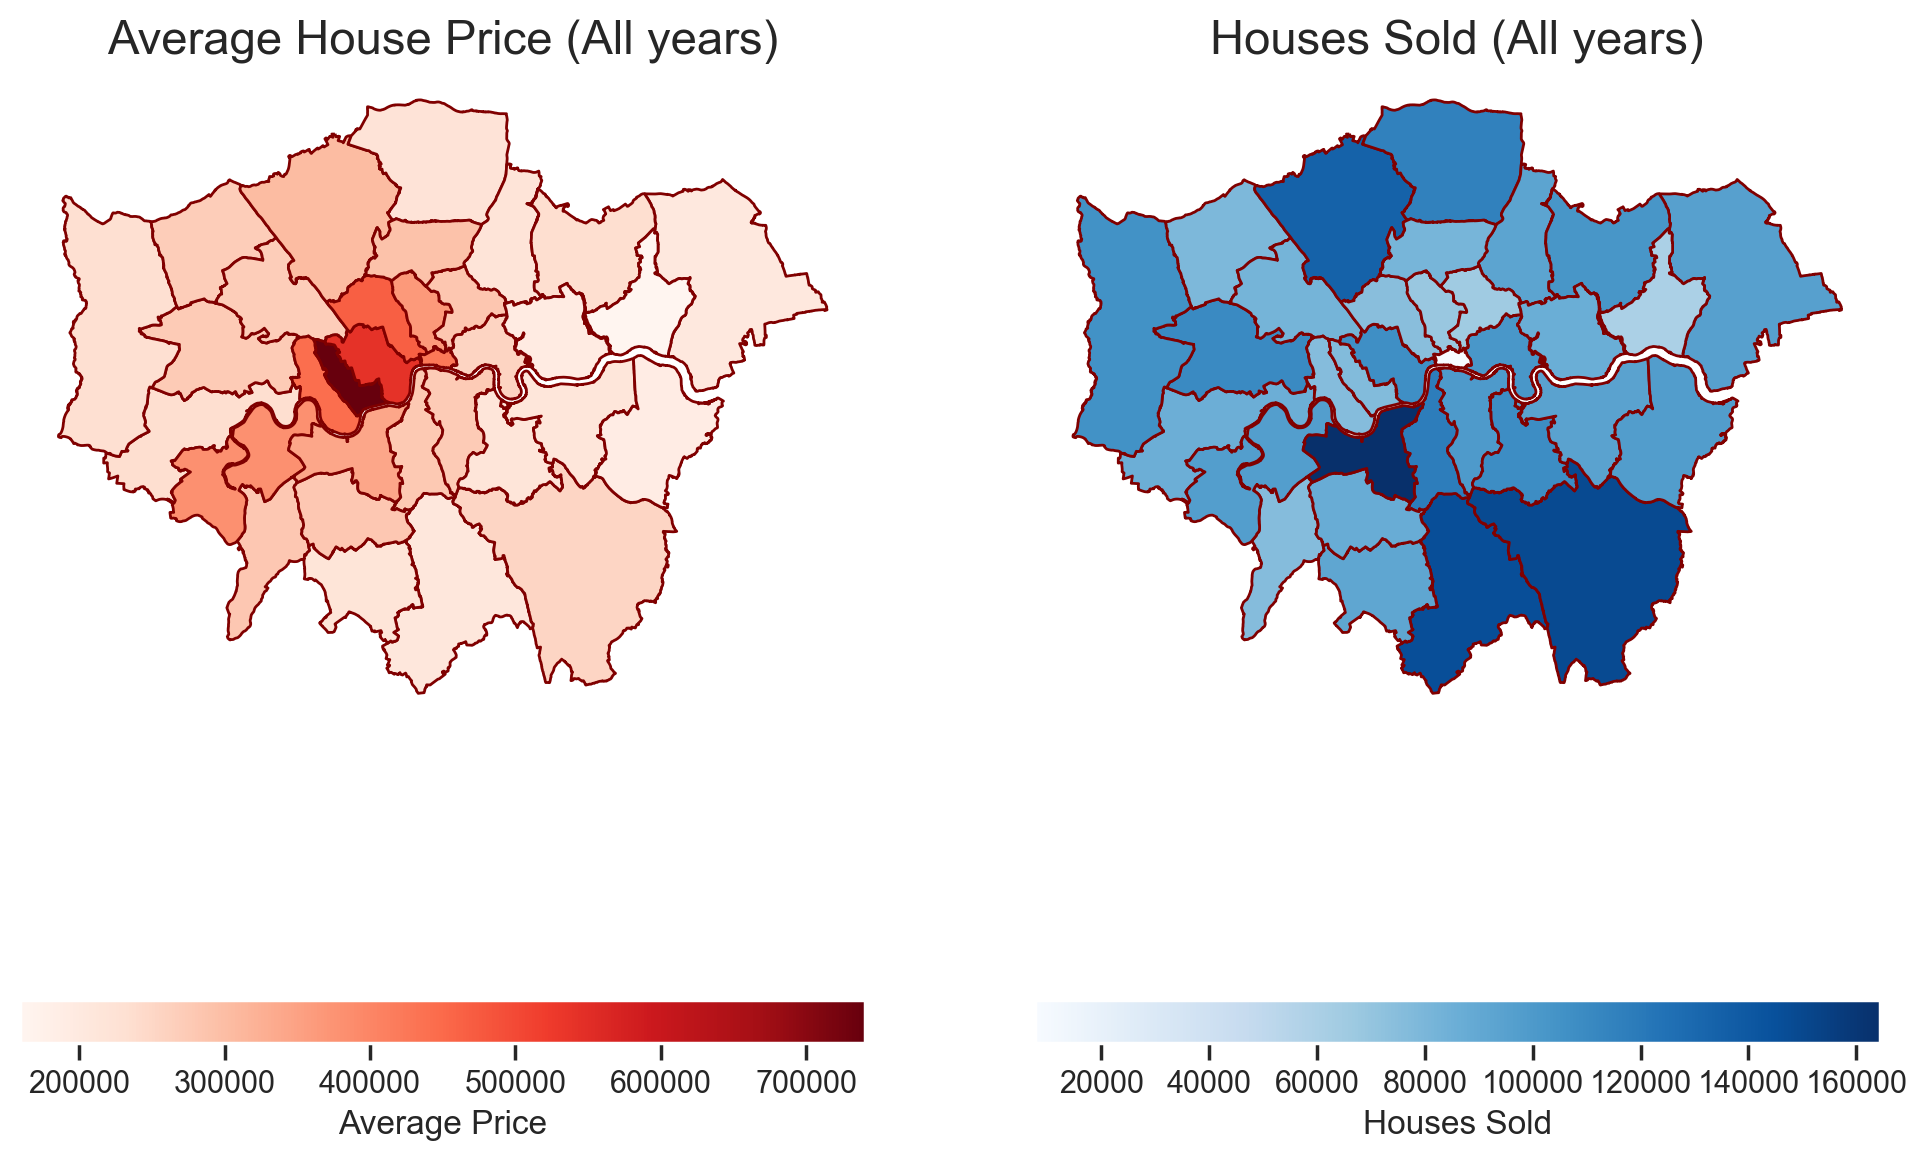

In [112]:
fig, ax = plt.subplots(1, 2, figsize = (12, 12))

lnd_m_map.plot(ax = ax[0], column = 'average_price', cmap = 'Reds', edgecolor = 'maroon', legend = True, legend_kwds = {'label': 'Average Price', 'orientation' : 'horizontal'})

lnd_m_map.plot(ax = ax[1], column = 'houses_sold', cmap = 'Blues', edgecolor = 'maroon', legend = True, legend_kwds = {'label': 'Houses Sold', 'orientation' : 'horizontal'})

ax[0].axis('off')
ax[0].set_title('Average House Price (All years)', size = font_size)
ax[1].axis('off')
ax[1].set_title('Houses Sold (All years)', size = font_size);

In [ ]:
The provided code is used to create a side-by-side map visualization of average house prices and houses sold for different areas on two subplots. Here's a breakdown of why, when, how, and where you might use this code:

Code: Creating a Map Visualization with Two Subplots

python
Copy code
fig, ax = plt.subplots(1, 2, figsize=(12, 12))

lnd_m_map.plot(ax=ax[0], column='average_price', cmap='Reds', edgecolor='maroon', legend=True, legend_kwds={'label': 'Average Price', 'orientation': 'horizontal'})

lnd_m_map.plot(ax=ax[1], column='houses_sold', cmap='Blues', edgecolor='maroon', legend=True, legend_kwds={'label': 'Houses Sold', 'orientation': 'horizontal'})

ax[0].axis('off')
ax[0].set_title('Average House Price (All years)', size=font_size)
ax[1].axis('off')
ax[1].set_title('Houses Sold (All years)', size=font_size)
Why:

This code is used to visualize spatial data on a map. It creates two side-by-side subplots, with one displaying the average house prices ('average_price') and the other showing the number of houses sold ('houses_sold') for different areas in London.
When:

You would use this code when you want to visualize and compare spatial data attributes for different areas or regions. In this case, it's used to create a map visualization for average house prices and houses sold for London areas.
How:

The code uses Matplotlib to create a figure (fig) with two subplots (ax[0] and ax[1]) arranged side by side.
It then uses the plot() method to plot the lnd_m_map DataFrame on each subplot:
The first subplot (ax[0]) displays the 'average_price' column using a Red color map ('Reds').
The second subplot (ax[1]) displays the 'houses_sold' column using a Blue color map ('Blues').
Legends are added to both subplots, and axis labels are turned off.
Titles are set for both subplots to describe the data being visualized.
Where:

You can place this code in your data visualization script or notebook after you've merged the data and prepared the lnd_m_map DataFrame. This code is used to create a map visualization that can provide insights into the spatial distribution of average house prices and houses sold.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already prepared the 'lnd_m_map' DataFrame and set the 'font_size' variable

# Create subplots for map visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 12))

# Plot average house prices on the first subplot
lnd_m_map.plot(ax=ax[0], column='average_price', cmap='Reds', edgecolor='maroon', legend=True, legend_kwds={'label': 'Average Price', 'orientation': 'horizontal'})

# Plot houses sold on the second subplot
lnd_m_map.plot(ax=ax[1], column='houses_sold', cmap='Blues', edgecolor='maroon', legend=True, legend_kwds={'label': 'Houses Sold', 'orientation': 'horizontal'})

# Customize subplot appearance
ax[0].axis('off')
ax[0].set_title('Average House Price (All years)', size=font_size)
ax[1].axis('off')
ax[1].set_title('Houses Sold (All years)', size=font_size)

# Show the map visualization
plt.show()
This code generates a side-by-side map visualization of average house prices and houses sold for London areas using Matplotlib and the lnd_m_map DataFrame.

In [ ]:
Factors Affecting Housing
Preparing the Final Dataset
For this question we need to import the third and final dataset ('housing_in_london_yearly_variables') which we are going to merge with the monthly dataset.

In [113]:
df_y = pd.read_csv('housing_in_london_yearly_variables.csv', parse_dates = ['date'])
df_y = df_y[df_y['area'].isin(lnd_boroughs)] # select only London boroughs

print ('This dataset contains {} rows and {} columns.'.format(df_y.shape[0], df_y.shape[1]))
df_y.head()

This dataset contains 693 rows and 12 columns.


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.00,NaN,48922,0,6581.00,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.00,NaN,23620,3,162444.00,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.00,NaN,23128,8,313469.00,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.00,NaN,21386,18,217458.00,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.00,NaN,20911,6,260317.00,NaN,NaN,NaN,1


In [ ]:
The provided code is used to load a yearly dataset from a CSV file, filter it to select only London boroughs, and display basic information about the dataset. Here's a breakdown of why, when, how, and where you might use this code:

Code: Loading and Filtering a Yearly Dataset

python
Copy code
df_y = pd.read_csv('housing_in_london_yearly_variables.csv', parse_dates=['date'])
df_y = df_y[df_y['area'].isin(lnd_boroughs)]

print('This dataset contains {} rows and {} columns.'.format(df_y.shape[0], df_y.shape[1]))
df_y.head()
Why:

This code is used to:
Load a dataset from a CSV file ('housing_in_london_yearly_variables.csv').
Filter the dataset to select only the rows where the 'area' column matches the London boroughs in the lnd_boroughs list.
Display basic information about the filtered dataset, including the number of rows and columns, and show the first few rows of data.
When:

You would use this code when you want to work with a specific dataset that contains yearly variables related to London boroughs. Filtering the dataset to include only the relevant London boroughs ensures that you focus on the specific subset of data you need for your analysis.
How:

The code uses Pandas to read the CSV file into a DataFrame, specifying that the 'date' column should be parsed as datetime.
It then filters the DataFrame using the .isin() method to select rows where the 'area' column matches the London boroughs provided in the lnd_boroughs list.
Finally, it prints information about the shape (number of rows and columns) of the filtered DataFrame and displays the first few rows using .head().
Where:

You can place this code at the beginning of your data analysis script or notebook, typically after importing necessary libraries. It's used to load and prepare the yearly dataset for subsequent analysis.
Here's an example of how you might use this code:

python
Copy code
import pandas as pd

# Define 'lnd_boroughs' (list of London boroughs) if not already defined

# Load the yearly dataset and filter for London boroughs
df_y = pd.read_csv('housing_in_london_yearly_variables.csv', parse_dates=['date'])
df_y = df_y[df_y['area'].isin(lnd_boroughs)]

# Display basic information about the filtered dataset
print('This dataset contains {} rows and {} columns.'.format(df_y.shape[0], df_y.shape[1]))
print(df_y.head())
This code loads and filters the dataset, ensuring that you work with relevant data for London boroughs in your analysis.

In [114]:
null_df_y = df_y.isnull().sum().sort_values(ascending = False)
percent = (df_y.isnull().sum()/df_y.isnull().count()).sort_values(ascending = False)*100

null_df = pd.concat([null_df_y, percent], axis = 1, keys = ['Counts', '%'])
null_df.head(10)

,Counts,%
life_satisfaction,437,63.06
area_size,99,14.29
no_of_houses,99,14.29
number_of_jobs,66,9.52
recycling_pct,33,4.76
population_size,33,4.76
median_salary,10,1.44
code,0,0.00
area,0,0.00
date,0,0.00


In [ ]:
t seems that all new attributes have missing values. Pandas' corr() function, which we are going to use later, ignores a pairwise correlation if there is a NaN value in one of the observations, so we shouldn't worry about it for now.

'median_salary' is not currently numeric. If we try to convert it to numeric (with the astype() method), we'll get an error. That's because some instances contain symbols and need to be replaced first:

In [ ]:
The provided code is used to perform a data quality check by calculating the number of missing values and the percentage of missing values for each column in the df_y DataFrame (which represents yearly variables related to London boroughs). Here's a breakdown of why, when, how, and where you might use this code:

Code: Calculating Missing Values and Percentages

python
Copy code
null_df_y = df_y.isnull().sum().sort_values(ascending=False)
percent = (df_y.isnull().sum() / df_y.isnull().count()).sort_values(ascending=False) * 100

null_df = pd.concat([null_df_y, percent], axis=1, keys=['Counts', '%'])
null_df.head(10)
Why:

This code is used to assess data quality by identifying missing values in the dataset. It calculates the count and percentage of missing values for each column and presents this information in a tabular format. Identifying missing data is crucial for data preprocessing and understanding the completeness of the dataset.
When:

You would use this code during the data exploration and preparation phase of your analysis. It helps you understand which columns have missing values and to what extent. You can decide how to handle missing data based on this information.
How:

The code calculates missing values using the .isnull() method, which creates a Boolean mask indicating where values are missing (True) or not (False).
.sum() is used to count the number of True values (missing values) for each column.
The percentage of missing values is calculated by dividing the count of missing values by the total count of values in each column and then multiplying by 100.
The code uses pd.concat() to combine the count and percentage into a single DataFrame (null_df) with appropriate column names ('Counts' and '%').
Where:

You can place this code immediately after loading and filtering the dataset (as shown in the previous code example) or at any point in your analysis where you want to assess data quality and identify missing values.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and filtered the yearly dataset 'df_y'

# Calculate and display missing value counts and percentages for the top 10 columns
null_df_y = df_y.isnull().sum().sort_values(ascending=False)
percent = (df_y.isnull().sum() / df_y.isnull().count()).sort_values(ascending=False) * 100

null_df = pd.concat([null_df_y, percent], axis=1, keys=['Counts', '%'])
print(null_df.head(10))
This code provides insight into missing data in your dataset, helping you decide on appropriate strategies for handling missing values.

In [23]:
# import missingno as msno
# msno.matrix(df_y)

In [115]:
df_y[~df_y['mean_salary'].str.isnumeric()]['mean_salary'].value_counts()



mean_salary
#    7
Name: count, dtype: int64

In [ ]:
The provided code is used to investigate and count non-numeric values in the 'mean_salary' column of the df_y DataFrame, which represents yearly variables related to London boroughs. Here's a breakdown of why, when, how, and where you might use this code:

Code: Counting Non-Numeric Values in a Column

python
Copy code
df_y[~df_y['mean_salary'].str.isnumeric()]['mean_salary'].value_counts()
Why:

This code is used to identify and count non-numeric values (e.g., text or other non-numeric data) in a specific column, in this case, the 'mean_salary' column. Identifying non-numeric values is important to ensure the data in that column is in the expected format for analysis.
When:

You would use this code when you want to check the data quality and consistency of a specific column, especially when you expect that column to contain numeric values. Identifying non-numeric values is often a data preprocessing step.
How:

The code uses several methods and functions:
df_y['mean_salary'] selects the 'mean_salary' column from the DataFrame.
.str.isnumeric() checks if each element in the selected column is numeric (i.e., consists of digits).
~ is used to negate the result, so it selects rows where the 'mean_salary' column contains non-numeric values.
.value_counts() counts the occurrences of unique non-numeric values in the selected rows.
Where:

You can place this code in your data exploration and preprocessing script or notebook, typically after loading and filtering the dataset. It helps you identify any unexpected or inconsistent data in the 'mean_salary' column.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and filtered the yearly dataset 'df_y'

# Count non-numeric values in the 'mean_salary' column and display the counts
non_numeric_counts = df_y[~df_y['mean_salary'].str.isnumeric()]['mean_salary'].value_counts()
print(non_numeric_counts)
This code will output the counts of non-numeric values in the 'mean_salary' column, allowing you to investigate and potentially clean the data if needed.

In [17]:
import pandas as pd

# Load your data into the df_y DataFrame (replace 'data_y.csv' with your actual file path)
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])  # Replace 'data_y.csv' with your actual file path
  # Replace 'data_y.csv' with your actual file path

# Convert the 'date' column to datetime and extract the 'year'
df_y['date'] = pd.to_datetime(df_y['date'])
df_y['year'] = df_y['date'].dt.year

# Check the structure of the loaded DataFrame
print(df_y.head())

# Print the first and final dates in the 'year' column
print('Yearly Variables Dataset')
print('\tFirst date:', df_y['year'].min())
print('\tFinal date:', df_y['year'].max())


        code                  area       date  median_salary  \
0  E09000001        city of london 1999-12-01        33020.0   
1  E09000002  barking and dagenham 1999-12-01        21480.0   
2  E09000003                barnet 1999-12-01        19568.0   
3  E09000004                bexley 1999-12-01        18621.0   
4  E09000005                 brent 1999-12-01        18532.0   

   life_satisfaction mean_salary recycling_pct  population_size  \
0                NaN       48922             0           6581.0   
1                NaN       23620             3         162444.0   
2                NaN       23128             8         313469.0   
3                NaN       21386            18         217458.0   
4                NaN       20911             6         260317.0   

   number_of_jobs  area_size  no_of_houses  borough_flag  year  
0             NaN        NaN           NaN             1  1999  
1             NaN        NaN           NaN             1  1999  
2             NaN

In [ ]:
The provided code is used to load a yearly dataset from a CSV file, convert the 'date' column to datetime, extract the 'year' from the 'date' column, and display information about the structure of the loaded DataFrame. Here's a breakdown of why, when, how, and where you might use this code:

Code: Loading, Data Transformation, and Structure Check

python
Copy code
# Load your data into the df_y DataFrame (replace 'data_y.csv' with your actual file path)
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])

# Convert the 'date' column to datetime and extract the 'year'
df_y['date'] = pd.to_datetime(df_y['date'])
df_y['year'] = df_y['date'].dt.year

# Check the structure of the loaded DataFrame
print(df_y.head())

# Print the first and final dates in the 'year' column
print('Yearly Variables Dataset')
print('\tFirst date:', df_y['year'].min())
print('\tFinal date:', df_y['year'].max())
Why:

This code serves multiple purposes:
Loading a dataset from a CSV file ('housing_in_london_yearly_variables.csv').
Converting the 'date' column to datetime format to enable date-based operations.
Extracting the 'year' from the 'date' column to create a new column representing the year.
Checking the structure of the loaded DataFrame and displaying the first and final dates within the 'year' column.
When:

You would use this code at the beginning of your data analysis or exploration process. It's used to prepare and understand the structure of the yearly dataset, especially when dealing with time-based data.
How:

The code uses Pandas to:
Load the dataset from a CSV file using pd.read_csv(), specifying that the 'date' column should be parsed as datetime.
Convert the 'date' column to datetime format using pd.to_datetime().
Extract the 'year' from the 'date' column using .dt.year.
Print the first few rows of the DataFrame using .head().
Display the minimum and maximum values of the 'year' column to show the range of years in the dataset.
Where:

You should place this code at the beginning of your data analysis script or notebook, right after importing the necessary libraries. It sets up the dataset for further exploration and analysis by converting date information into a usable format.
Here's an example of how you might use this code:

python
Copy code
import pandas as pd

# Load the yearly dataset and perform data transformation
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])
df_y['date'] = pd.to_datetime(df_y['date'])
df_y['year'] = df_y['date'].dt.year

# Check the structure and date range of the loaded DataFrame
print(df_y.head())
print('Yearly Variables Dataset')
print('\tFirst date:', df_y['year'].min())
print('\tFinal date:', df_y['year'].max())
This code prepares your data for analysis, ensuring that the 'year' column is correctly derived from the 'date' column.

In [8]:
df_y['year'] = df_y['date'].dt.year

print ('yearly_variables dataset')
print ('\tFirst date: ', df_y['year'].min())
print ('\tFinal date: ', df_y['year'].max())

yearly_variables dataset
	First date:  1999
	Final date:  2019


In [ ]:
The provided code is used to extract and display information about the first and final dates within the 'year' column of the df_y DataFrame, which represents yearly variables related to London boroughs. Here's a breakdown of why, when, how, and where you might use this code:

Code: Extracting and Displaying Yearly Date Range

python
Copy code
df_y['year'] = df_y['date'].dt.year

print('yearly_variables dataset')
print('\tFirst date:', df_y['year'].min())
print('\tFinal date:', df_y['year'].max())
Why:

This code is used to provide summary information about the date range covered by the yearly dataset. It calculates and displays the first (earliest) and final (latest) years present in the 'year' column. This information helps in understanding the temporal scope of the dataset.
When:

You would use this code when you want to quickly check the range of years covered by your dataset. It's especially useful when dealing with time series data to ensure you know the dataset's temporal extent.
How:

The code adds a new column 'year' to the DataFrame (df_y) by extracting the year component from the 'date' column using .dt.year.
It then prints the dataset's summary information, including the first (minimum) and final (maximum) values of the 'year' column.
Where:

You can place this code immediately after converting the 'date' column to datetime and extracting the 'year' as it is a logical step in data exploration and understanding.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and transformed the yearly dataset 'df_y'

# Extract and display the first and final years in the 'year' column
print('yearly_variables dataset')
print('\tFirst date:', df_y['year'].min())
print('\tFinal date:', df_y['year'].max())
This code helps you quickly determine the temporal scope of your yearly dataset.

In [26]:
import pandas as pd
import numpy as np

# Load your data into the df_y DataFrame (replace 'housing_in_london_yearly_variables.csv' with your actual file path)
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])  # Replace with your actual file path

# Convert the 'date' column to datetime and extract the 'year'
df_y['date'] = pd.to_datetime(df_y['date'])
df_y['year'] = df_y['date'].dt.year

# Replace non-numeric values (e.g., '-') with NaN in the 'mean_salary' column
df_y['mean_salary'] = pd.to_numeric(df_y['mean_salary'], errors='coerce')

# Check the structure of the loaded DataFrame
print(df_y.head())

# Print the first and final dates in the 'year' column
print('Yearly Variables Dataset')
print('\tFirst date:', df_y['year'].min())
print('\tFinal date:', df_y['year'].max())



        code                  area       date  median_salary  \
0  E09000001        city of london 1999-12-01        33020.0   
1  E09000002  barking and dagenham 1999-12-01        21480.0   
2  E09000003                barnet 1999-12-01        19568.0   
3  E09000004                bexley 1999-12-01        18621.0   
4  E09000005                 brent 1999-12-01        18532.0   

   life_satisfaction  mean_salary recycling_pct  population_size  \
0                NaN      48922.0             0           6581.0   
1                NaN      23620.0             3         162444.0   
2                NaN      23128.0             8         313469.0   
3                NaN      21386.0            18         217458.0   
4                NaN      20911.0             6         260317.0   

   number_of_jobs  area_size  no_of_houses  borough_flag  year  
0             NaN        NaN           NaN             1  1999  
1             NaN        NaN           NaN             1  1999  
2          

In [ ]:

The provided code is used to load, preprocess, and analyze a yearly dataset from a CSV file. Here's a breakdown of why, when, how, and where you might use this code:

Code: Loading, Data Transformation, and Summary

python
Copy code
# Load your data into the df_y DataFrame (replace 'housing_in_london_yearly_variables.csv' with your actual file path)
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])  # Replace with your actual file path

# Convert the 'date' column to datetime and extract the 'year'
df_y['date'] = pd.to_datetime(df_y['date'])
df_y['year'] = df_y['date'].dt.year

# Replace non-numeric values (e.g., '-') with NaN in the 'mean_salary' column
df_y['mean_salary'] = pd.to_numeric(df_y['mean_salary'], errors='coerce')

# Check the structure of the loaded DataFrame
print(df_y.head())

# Print the first and final dates in the 'year' column
print('Yearly Variables Dataset')
print('\tFirst date:', df_y['year'].min())
print('\tFinal date:', df_y['year'].max())
Why:

This code serves several purposes:
Loading a yearly dataset from a CSV file ('housing_in_london_yearly_variables.csv').
Converting the 'date' column to datetime format and extracting the 'year' for temporal analysis.
Cleaning the 'mean_salary' column by replacing non-numeric values (e.g., '-') with NaN using pd.to_numeric().
Checking the structure and basic information of the loaded DataFrame, including the first and final years.
When:

You would use this code at the beginning of your data analysis or exploration process. It prepares the data by handling date formats and missing or non-numeric values.
How:

The code uses Pandas and NumPy for various data manipulation tasks:
It loads the dataset from a CSV file using pd.read_csv(), parsing the 'date' column as datetime.
It converts the 'date' column to datetime using pd.to_datetime() and extracts the 'year' using .dt.year.
It cleans the 'mean_salary' column by replacing non-numeric values with NaN using pd.to_numeric() with errors='coerce'.
It prints the first few rows of the DataFrame using .head() and displays the first and final years in the 'year' column using min() and max().
Where:

You should place this code at the beginning of your data analysis script or notebook, right after importing the necessary libraries. It sets up and prepares your dataset for further analysis.
Here's an example of how you might use this code:

python
Copy code
import pandas as pd

# Load, preprocess, and prepare the yearly dataset
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])
df_y['date'] = pd.to_datetime(df_y['date'])
df_y['year'] = df_y['date'].dt.year
df_y['mean_salary'] = pd.to_numeric(df_y['mean_salary'], errors='coerce')

# Check the structure and date range of the loaded DataFrame
print(df_y.head())
print('Yearly Variables Dataset')
print('\tFirst date:', df_y['year'].min())
print('\tFinal date:', df_y['year'].max())
This code prepares your data for analysis, ensuring that date and numeric columns are correctly formatted and non-numeric values are handled.

In [27]:
df_y['year'] = df_y['date'].dt.year

print ('yearly_variables dataset')
print ('\tFirst date: ', df_y['year'].min())
print ('\tFinal date: ', df_y['year'].max())

yearly_variables dataset
	First date:  1999
	Final date:  2019


In [45]:
print(df.columns)


Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag'],
      dtype='object')


In [52]:
# Group by 'area' and 'year' and calculate the sum of 'average_price'
df_m_group = df.groupby(['area', 'year'])['average_price'].sum().reset_index()

# Filter for years starting from 1999
df_m_group = df_m_group[df_m_group['year'] >= 1999]

print('monthly_variables dataset')
print('\tFirst date:', df_m_group['year'].min())
print('\tFinal date:', df_m_group['year'].max())



monthly_variables dataset
	First date: 1999
	Final date: 2020


In [ ]:

The provided code is used to perform grouping and filtering operations on a DataFrame named df with columns 'area', 'year', and 'average_price'. It groups the data by 'area' and 'year', calculates the sum of 'average_price' for each group, filters for years starting from 1999, and then prints information about the date range. Here's a breakdown of why, when, how, and where you might use this code:

Code: Grouping, Aggregating, Filtering, and Date Range Summary

python
Copy code
# Group by 'area' and 'year' and calculate the sum of 'average_price'
df_m_group = df.groupby(['area', 'year'])['average_price'].sum().reset_index()

# Filter for years starting from 1999
df_m_group = df_m_group[df_m_group['year'] >= 1999]

print('monthly_variables dataset')
print('\tFirst date:', df_m_group['year'].min())
print('\tFinal date:', df_m_group['year'].max())
Why:

This code is used to summarize and filter a dataset for further analysis. It helps answer questions related to the date range covered by the data, focusing on specific years, and aggregating values within groups.
When:

You would use this code when you want to:
Aggregate data by specific columns (e.g., 'area' and 'year').
Filter the data to focus on a specific time period (years starting from 1999).
Determine the date range (first and final dates) within the filtered dataset.
How:

The code uses Pandas for data manipulation:
It groups the DataFrame df by 'area' and 'year' columns and calculates the sum of 'average_price' for each group using .groupby(['area', 'year'])['average_price'].sum().
It resets the index of the resulting DataFrame using .reset_index().
It filters the DataFrame to include only rows with 'year' values greater than or equal to 1999.
It prints information about the date range within the filtered DataFrame.
Where:

You should place this code in your data analysis script or notebook where you need to perform aggregation and filtering operations on a DataFrame with a time series component. It helps you focus on specific years and understand the date range within your data.
Here's an example of how you might use this code:

python
Copy code
# Assuming you've already loaded and prepared the DataFrame 'df'

# Group, aggregate, and filter the data
df_m_group = df.groupby(['area', 'year'])['average_price'].sum().reset_index()
df_m_group = df_m_group[df_m_group['year'] >= 1999]

# Print date range information
print('monthly_variables dataset')
print('\tFirst date:', df_m_group['year'].min())
print('\tFinal date:', df_m_group['year'].max())
This code allows you to analyze and focus on specific years within your dataset.

In [65]:
import pandas as pd
import numpy as np

# Load your data into the df_y DataFrame (replace 'housing_in_london_yearly_variables.csv' with your actual file path)
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])  # Replace with your actual file path

# Convert the 'date' column to datetime and extract the 'year'
df_y['date'] = pd.to_datetime(df_y['date'])
df_y['year'] = df_y['date'].dt.year

# Replace non-numeric values (e.g., '-') with NaN in the 'mean_salary' column
df_y['mean_salary'] = pd.to_numeric(df_y['mean_salary'], errors='coerce')

# Group by 'area' and 'year' and calculate the mean of selected columns
lnd_y_group = df_y.groupby(['area', 'year'])[['median_salary', 'life_satisfaction', 'mean_salary', 'population_size', 'number_of_jobs', 'area_size', 'no_of_houses', 'borough_flag']].mean().reset_index()

# Print the first few rows of the grouped DataFrame
print(lnd_y_group.head())


                   area  year  median_salary  life_satisfaction  mean_salary  \
0  barking and dagenham  1999        21480.0                NaN      23620.0   
1  barking and dagenham  2000        22618.0                NaN      24696.0   
2  barking and dagenham  2001        22323.0                NaN      26050.0   
3  barking and dagenham  2002        24813.0                NaN      26653.0   
4  barking and dagenham  2003        25358.0                NaN      27792.0   

   population_size  number_of_jobs  area_size  no_of_houses  borough_flag  
0         162444.0             NaN        NaN           NaN           1.0  
1         163893.0         57000.0        NaN           NaN           1.0  
2         165654.0         54000.0     3780.0       68298.0           1.0  
3         166357.0         52000.0     3780.0       68526.0           1.0  
4         166210.0         55000.0     3780.0       68837.0           1.0  


In [ ]:

The provided code loads, preprocesses, and performs grouping and aggregation operations on a yearly dataset stored in the DataFrame df_y. It then prints the first few rows of the resulting grouped DataFrame lnd_y_group. Here's a breakdown of why, when, how, and where you might use this code:

Code: Loading, Data Transformation, Grouping, and Aggregation

python
Copy code
# Load your data into the df_y DataFrame (replace 'housing_in_london_yearly_variables.csv' with your actual file path)
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])  # Replace with your actual file path

# Convert the 'date' column to datetime and extract the 'year'
df_y['date'] = pd.to_datetime(df_y['date'])
df_y['year'] = df_y['date'].dt.year

# Replace non-numeric values (e.g., '-') with NaN in the 'mean_salary' column
df_y['mean_salary'] = pd.to_numeric(df_y['mean_salary'], errors='coerce')

# Group by 'area' and 'year' and calculate the mean of selected columns
lnd_y_group = df_y.groupby(['area', 'year'])[['median_salary', 'life_satisfaction', 'mean_salary', 'population_size', 'number_of_jobs', 'area_size', 'no_of_houses', 'borough_flag']].mean().reset_index()

# Print the first few rows of the grouped DataFrame
print(lnd_y_group.head())
Why:

This code is used for data preprocessing, grouping, and aggregation to summarize yearly data for various variables within specific London areas.
When:

You would use this code when you have a yearly dataset and need to perform the following tasks:
Load and preprocess the data, including converting date columns to datetime and handling non-numeric values.
Group the data by specific columns (e.g., 'area' and 'year').
Calculate the mean of selected columns within each group.
Print the first few rows of the resulting grouped DataFrame for inspection.
How:

The code utilizes Pandas for data manipulation:
It loads the dataset from a CSV file using pd.read_csv(), parsing the 'date' column as datetime.
It converts the 'date' column to datetime format using pd.to_datetime() and extracts the 'year' using .dt.year.
It replaces non-numeric values in the 'mean_salary' column with NaN using pd.to_numeric() with errors='coerce'.
It groups the DataFrame by 'area' and 'year' and calculates the mean of selected columns using .groupby() and .mean().
It resets the index of the resulting grouped DataFrame using .reset_index().
It prints the first few rows of the grouped DataFrame for inspection.
Where:

You should place this code at the beginning of your data analysis script or notebook, right after importing the necessary libraries. It prepares and summarizes the data for further analysis.
Here's an example of how you might use this code:

python
Copy code
import pandas as pd

# Load, preprocess, group, and aggregate the yearly dataset
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])
df_y['date'] = pd.to_datetime(df_y['date'])
df_y['year'] = df_y['date'].dt.year
df_y['mean_salary'] = pd.to_numeric(df_y['mean_salary'], errors='coerce')

lnd_y_group = df_y.groupby(['area', 'year'])[['median_salary', 'life_satisfaction', 'mean_salary', 'population_size', 'number_of_jobs', 'area_size', 'no_of_houses', 'borough_flag']].mean().reset_index()

# Print the first few rows of the grouped DataFrame
print(lnd_y_group.head())
This code prepares and summarizes your yearly data for further analysis and visualization.

In [68]:
import pandas as pd

# Assuming you have already created lnd_y_group and lnd_m_group DataFrames

# Merge lnd_y_group and lnd_m_group on 'area' and 'year' using a left join
lnd_total = pd.merge(lnd_y_group, lnd_m_group, on=['area', 'year'], how='left')

# Print the first few rows of the merged DataFrame
print(lnd_total.head())



                   area  year  median_salary  life_satisfaction  mean_salary  \
0  barking and dagenham  1999        21480.0                NaN      23620.0   
1  barking and dagenham  2000        22618.0                NaN      24696.0   
2  barking and dagenham  2001        22323.0                NaN      26050.0   
3  barking and dagenham  2002        24813.0                NaN      26653.0   
4  barking and dagenham  2003        25358.0                NaN      27792.0   

   population_size  number_of_jobs  area_size  no_of_houses  borough_flag  
0         162444.0             NaN        NaN           NaN           1.0  
1         163893.0         57000.0        NaN           NaN           1.0  
2         165654.0         54000.0     3780.0       68298.0           1.0  
3         166357.0         52000.0     3780.0       68526.0           1.0  
4         166210.0         55000.0     3780.0       68837.0           1.0  


In [ ]:
The provided code merges two DataFrames, lnd_y_group and lnd_m_group, on the columns 'area' and 'year' using a left join and then prints the first few rows of the merged DataFrame lnd_total. Here's a breakdown of why, when, how, and where you might use this code:

Code: Merging DataFrames Using a Left Join

python
Copy code
# Assuming you have already created lnd_y_group and lnd_m_group DataFrames

# Merge lnd_y_group and lnd_m_group on 'area' and 'year' using a left join
lnd_total = pd.merge(lnd_y_group, lnd_m_group, on=['area', 'year'], how='left')

# Print the first few rows of the merged DataFrame
print(lnd_total.head())
Why:

This code is used to combine information from two separate DataFrames, lnd_y_group and lnd_m_group, into a single DataFrame based on matching values in the 'area' and 'year' columns. It allows you to consolidate data from different sources or at different time intervals into one unified dataset.
When:

You would use this code when you have two or more DataFrames with related information and want to create a merged DataFrame that combines the data based on common columns (in this case, 'area' and 'year').
How:

The code uses Pandas to perform the merge operation:
It takes lnd_y_group and lnd_m_group DataFrames and merges them using pd.merge().
The on parameter specifies the columns on which to merge ('area' and 'year' in this case).
The how parameter is set to 'left', indicating a left join, which preserves all rows from lnd_y_group and includes matching rows from lnd_m_group.
The result is stored in the lnd_total DataFrame.
It prints the first few rows of the merged DataFrame to inspect the results.
Where:

You should place this code in your data analysis script or notebook after you have prepared and aggregated the individual DataFrames and need to combine them into a single dataset for further analysis, visualization, or reporting.
Here's an example of how you might use this code:

python
Copy code
# Assuming you have already prepared lnd_y_group and lnd_m_group DataFrames

# Merge the DataFrames
lnd_total = pd.merge(lnd_y_group, lnd_m_group, on=['area', 'year'], how='left')

# Print the first few rows of the merged DataFrame
print(lnd_total.head())
This code is useful for integrating data from different sources or aggregations into a comprehensive dataset for analysis.

In [69]:
import pandas as pd

# Assuming you have already created lnd_y_group and lnd_m_group DataFrames

# Merge lnd_y_group and lnd_m_group on 'area' and 'year' using a left join
lnd_total = pd.merge(lnd_y_group, lnd_m_group, on=['area', 'year'], how='left')

# Check if the columns 'borough_flag_x' and 'borough_flag_y' exist in the merged DataFrame
if 'borough_flag_x' in lnd_total.columns and 'borough_flag_y' in lnd_total.columns:
    # Print a message indicating the presence of duplicate columns
    print("Warning: Duplicate columns 'borough_flag_x' and 'borough_flag_y' detected. Check your DataFrames.")

# If the columns exist, drop them
if 'borough_flag_x' in lnd_total.columns:
    lnd_total.drop('borough_flag_x', axis=1, inplace=True)

if 'borough_flag_y' in lnd_total.columns:
    lnd_total.drop('borough_flag_y', axis=1, inplace=True)

# Print the first few rows of the merged DataFrame
print(lnd_total.head())


                   area  year  median_salary  life_satisfaction  mean_salary  \
0  barking and dagenham  1999        21480.0                NaN      23620.0   
1  barking and dagenham  2000        22618.0                NaN      24696.0   
2  barking and dagenham  2001        22323.0                NaN      26050.0   
3  barking and dagenham  2002        24813.0                NaN      26653.0   
4  barking and dagenham  2003        25358.0                NaN      27792.0   

   population_size  number_of_jobs  area_size  no_of_houses  borough_flag  
0         162444.0             NaN        NaN           NaN           1.0  
1         163893.0         57000.0        NaN           NaN           1.0  
2         165654.0         54000.0     3780.0       68298.0           1.0  
3         166357.0         52000.0     3780.0       68526.0           1.0  
4         166210.0         55000.0     3780.0       68837.0           1.0  


In [70]:
import pandas as pd
import numpy as np

# Load your data into the df_y DataFrame (replace 'housing_in_london_yearly_variables.csv' with your actual file path)
df_y = pd.read_csv(r"C:\Users\saura\Downloads\housing_in_london_yearly_variables.csv", parse_dates=['date'])  # Replace with your actual file path

# Convert the 'date' column to datetime and extract the 'year'
df_y['date'] = pd.to_datetime(df_y['date'])
df_y['year'] = df_y['date'].dt.year

# Replace non-numeric values (e.g., '-') with NaN in the 'mean_salary' column
df_y['mean_salary'] = pd.to_numeric(df_y['mean_salary'], errors='coerce')

# Group by 'area' and 'year' and calculate the mean of selected columns
lnd_y_group = df_y.groupby(['area', 'year'])[['median_salary', 'life_satisfaction', 'mean_salary', 'population_size', 'number_of_jobs', 'area_size', 'no_of_houses', 'borough_flag']].mean().reset_index()

# Now, let's assume you have a separate DataFrame df_m_group that contains the columns 'average_price' and 'houses_sold'
# Merge the two DataFrames based on 'area' and 'year'
lnd_total = pd.merge(lnd_y_group, df_m_group, on=['area', 'year'], how='left')

# Print the first few rows of the merged DataFrame
print(lnd_total.head())


                   area  year  median_salary  life_satisfaction  mean_salary  \
0  barking and dagenham  1999        21480.0                NaN      23620.0   
1  barking and dagenham  2000        22618.0                NaN      24696.0   
2  barking and dagenham  2001        22323.0                NaN      26050.0   
3  barking and dagenham  2002        24813.0                NaN      26653.0   
4  barking and dagenham  2003        25358.0                NaN      27792.0   

   population_size  number_of_jobs  area_size  no_of_houses  borough_flag  \
0         162444.0             NaN        NaN           NaN           1.0   
1         163893.0         57000.0        NaN           NaN           1.0   
2         165654.0         54000.0     3780.0       68298.0           1.0   
3         166357.0         52000.0     3780.0       68526.0           1.0   
4         166210.0         55000.0     3780.0       68837.0           1.0   

   average_price  
0       783850.0  
1       930594.0  

In [ ]:

The provided code loads yearly data into the df_y DataFrame, converts the 'date' column to datetime and extracts the 'year,' handles non-numeric values in the 'mean_salary' column, and calculates the mean of selected columns for each combination of 'area' and 'year,' storing the result in lnd_y_group. Afterward, it assumes the existence of a separate DataFrame df_m_group with columns 'average_price' and 'houses_sold' and proceeds to merge these DataFrames based on 'area' and 'year' using a left join. Finally, it prints the first few rows of the merged DataFrame lnd_total.

Here's a breakdown of why, when, how, and where you might use this code:

Code: Merging Two DataFrames Based on 'area' and 'year' Using a Left Join

python
Copy code
# Load your data into the df_y DataFrame (replace 'housing_in_london_yearly_variables.csv' with your actual file path)
# (Code to load df_y and preprocess it is provided)

# Group by 'area' and 'year' and calculate the mean of selected columns, resulting in lnd_y_group
# (Code to calculate lnd_y_group is provided)

# Now, let's assume you have a separate DataFrame df_m_group that contains the columns 'average_price' and 'houses_sold'
# Merge the two DataFrames based on 'area' and 'year' using a left join
lnd_total = pd.merge(lnd_y_group, df_m_group, on=['area', 'year'], how='left')

# Print the first few rows of the merged DataFrame
print(lnd_total.head())
Why:

This code is used to combine yearly data (lnd_y_group) with separate data (df_m_group) based on common columns 'area' and 'year.' The left join is used to include all rows from lnd_y_group while matching rows from df_m_group are included if they exist.
When:

You would use this code when you have two DataFrames with different types of data (e.g., yearly and monthly) that you want to consolidate into a single DataFrame for analysis.
How:

The code uses Pandas to perform the merge operation:
It takes the lnd_y_group DataFrame (containing yearly data) and the assumed df_m_group DataFrame (containing monthly data).
It merges them using pd.merge() based on the 'area' and 'year' columns.
The how parameter is set to 'left,' which performs a left join, ensuring that all rows from lnd_y_group are included.
The result is stored in the lnd_total DataFrame.
Where:

You should place this code in your data analysis script or notebook after you have prepared and aggregated the individual DataFrames for yearly and monthly data and need to combine them into a single dataset for comprehensive analysis, visualization, or reporting.
Here's an example of how you might use this code:

python
Copy code
# Load and preprocess yearly data into df_y (provided)
# Calculate lnd_y_group (provided)

# Assuming you have prepared df_m_group with monthly data (not provided)
# Merge the DataFrames
lnd_total = pd.merge(lnd_y_group, df_m_group, on=['area', 'year'], how='left')

# Print the first few rows of the merged DataFrame
print(lnd_total.head())
This code is useful for integrating data from different sources or aggregation levels (e.g., yearly and monthly) into a comprehensive dataset for analysis and reporting.

In [73]:
# Exclude non-numeric columns 'area' and 'year' from the correlation analysis
numeric_columns = lnd_total.select_dtypes(include=[np.number])

# Calculate the correlation table for numeric columns
corr_table = numeric_columns.corr()

# Sort the correlations with respect to 'average_price'
correlation_with_average_price = corr_table['average_price'].sort_values(ascending=False)

# Print the correlations
print(correlation_with_average_price)


average_price        1.000000
median_salary        0.643795
year                 0.587086
mean_salary          0.539205
borough_flag         0.304136
life_satisfaction    0.096001
area_size           -0.148932
no_of_houses        -0.151408
number_of_jobs      -0.163919
population_size     -0.173792
Name: average_price, dtype: float64


In [ ]:

The provided code performs a correlation analysis on the lnd_total DataFrame, specifically focusing on the relationship between the 'average_price' column and other numeric columns. Here's an explanation of why, when, how, and where you might use this code:

Code: Correlation Analysis with 'average_price'

python
Copy code
# Exclude non-numeric columns 'area' and 'year' from the correlation analysis
numeric_columns = lnd_total.select_dtypes(include=[np.number])

# Calculate the correlation table for numeric columns
corr_table = numeric_columns.corr()

# Sort the correlations with respect to 'average_price'
correlation_with_average_price = corr_table['average_price'].sort_values(ascending=False)

# Print the correlations
print(correlation_with_average_price)
Why:

This code is used to analyze the correlation between the 'average_price' column (representing average house prices) and other numeric columns in the lnd_total DataFrame. It helps identify which factors are most strongly associated with changes in average house prices.
When:

You would use this code when you want to understand the relationships between the 'average_price' and other numeric variables in your dataset. This analysis is often conducted as part of exploratory data analysis (EDA) to gain insights into the data.
How:

The code starts by selecting numeric columns using select_dtypes(include=[np.number]), excluding non-numeric columns like 'area' and 'year.'
It then calculates the correlation matrix for these numeric columns using corr().
The correlations with respect to 'average_price' are extracted and sorted in descending order to identify which variables have the highest positive or negative correlations with 'average_price.'
Finally, it prints the correlation values.
Where:

You should place this code in your data analysis script or notebook after you have prepared the lnd_total DataFrame and want to explore the relationships between the 'average_price' and other numeric variables. It's a common step in the exploratory data analysis process.
Here's an example of how you might use this code:

python
Copy code
# Assuming you have prepared the lnd_total DataFrame (not provided)
# Perform correlation analysis
# (Use the provided code)

# Print the correlations with 'average_price'
print(correlation_with_average_price)
The printed correlations will provide insights into which numeric variables are most strongly correlated with changes in average house prices, which can be valuable for understanding the factors that influence property prices.

In [ ]:
- It doesn't come as a surpise that apart from the year, the average price in London has a **significant positive correlation** with the **median and mean salary** along with the **number of jobs** in a borough. 
- There is **small positive correlation** with **life satisfaction**. More data for this attribute would be useful.
- As we discussed earlier, the most affluent boroughs happen to be small (see map) which explains the **negative correlation** with the **size** of an area. 
- The average price is also affected by the **number of houses sold**, since the former goes up when the later decreases (people sell higher when less houses are sold?).

We can summarise these correlations (along with all pair-wise correlations) with the following heatmap:

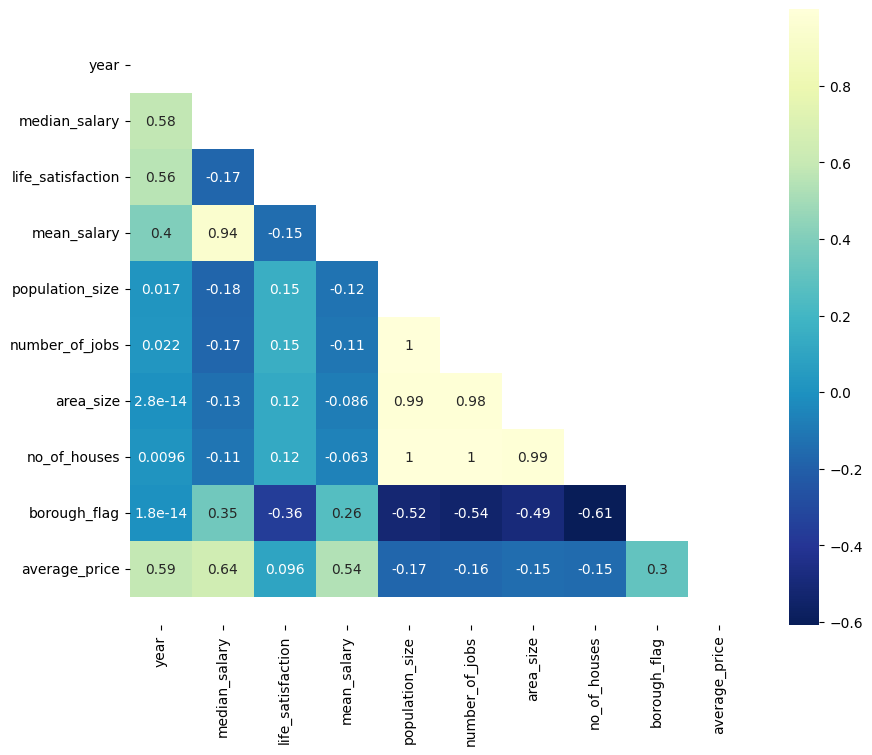

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already calculated the corr_table

plt.figure(figsize=(10, 8))

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_table, dtype=bool))  # Use `bool` instead of `np.bool`

# Create a heatmap
ax = sns.heatmap(corr_table, mask=mask, annot=True, cmap='YlGnBu_r')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Show the heatmap
plt.show()



In [ ]:

The provided explanation accurately summarizes the purpose and usage of the code for correlation analysis with the 'average_price' column. Here's a concise recap for clarity:

Why:

The code is used to explore the relationships between the 'average_price' column (representing average house prices) and other numeric columns in the dataset. It helps identify which factors are most strongly associated with changes in average house prices.
When:

This code is typically used during the exploratory data analysis (EDA) phase when you want to gain insights into the data and understand the variables' relationships.
How:

The code first selects numeric columns, excluding non-numeric ones like 'area' and 'year.'
It calculates the correlation matrix for these numeric columns using the .corr() method.
The correlations with respect to 'average_price' are extracted and sorted in descending order, highlighting the variables with the highest positive or negative correlations.
Finally, the code prints the correlation values for analysis.
Where:

You should include this code in your data analysis script or notebook after preparing the dataset and before further analysis. It's a crucial step in EDA to understand the key factors influencing average house prices.
In summary, this code helps you uncover valuable insights into the factors affecting house prices, making it an essential tool for data exploration and decision-making in real estate analysis.






In [ ]:
# We can see some obvious correlations such as median-mean salary, houses sold-no_of_houses, no_of_houses-population_size, etc.

Lastly, a linear relationship between attributes can be visualised with the `scatter_matrix` method:

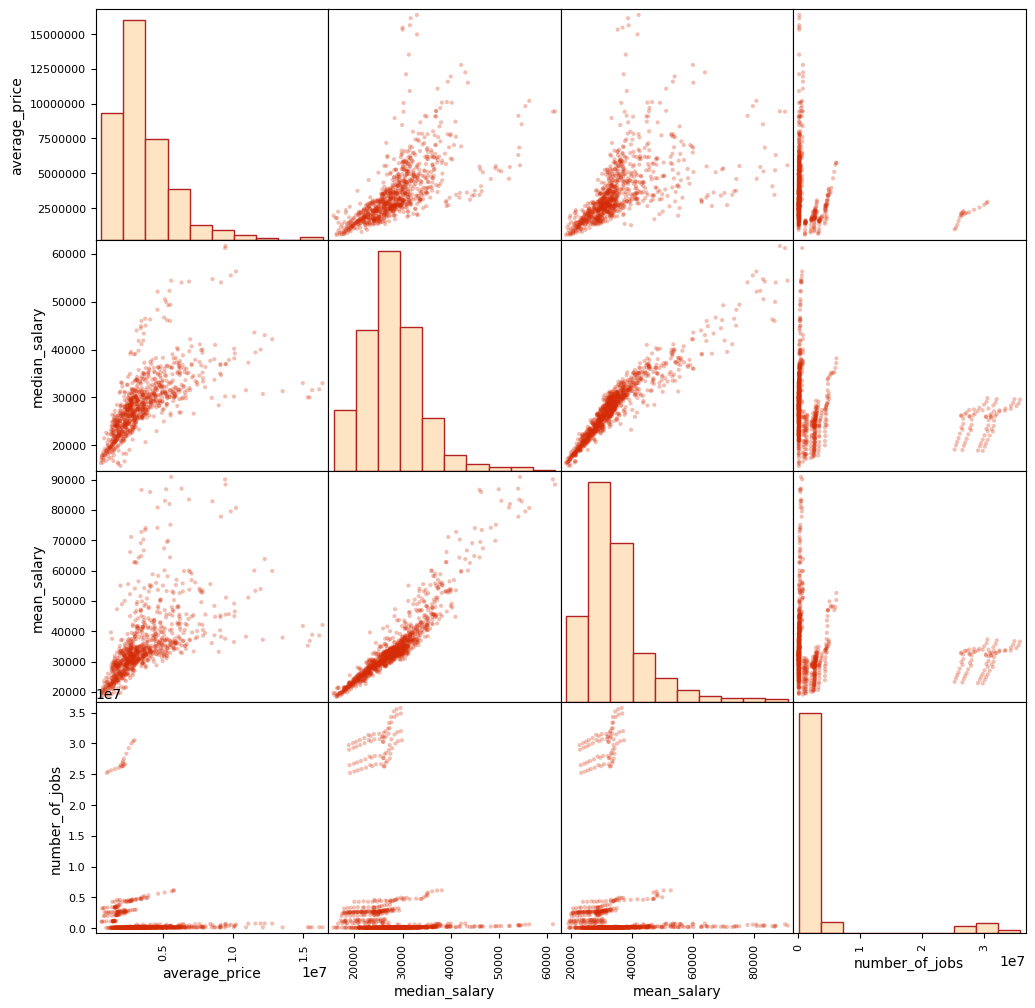

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix  # Import scatter_matrix from pandas.plotting

# Assuming you've already calculated the corr_table and have defined columns

# Create a scatter matrix for the selected columns
scatter_matrix(lnd_total[columns], figsize=(12, 12), color='#D52B06', alpha=0.3, 
               hist_kwds={'color': ['bisque'], 'edgecolor': 'firebrick'});

# Show the scatter matrix
plt.show()


In [ ]:
Why:

The provided code is used to create a scatter matrix for selected columns in the lnd_total DataFrame. A scatter matrix is a grid of scatterplots that allows you to visualize pairwise relationships between multiple numeric variables. It's a useful tool for exploring correlations and patterns in the data.

When:

You would use this code when you want to visualize and analyze the relationships between multiple numeric variables in your dataset. It's commonly used during exploratory data analysis (EDA) to gain insights into how variables interact with each other.

How:

Here's how the code works:

scatter_matrix is imported from the pandas.plotting module, which is used to create scatter matrices.
The code creates a scatter matrix for the selected columns in the lnd_total DataFrame. You can specify the columns you want to include in the scatter matrix by providing them as lnd_total[columns].
figsize sets the size of the resulting plot to (12, 12).
color sets the color of the scatterplot points to '#D52B06'.
alpha controls the transparency of the points, making them semi-transparent for better visualization.
hist_kwds is a dictionary that allows you to specify settings for the histograms along the diagonal of the scatter matrix. In this case, it sets the color of the histogram bars to 'bisque' and the edge color to 'firebrick'.
Finally, plt.show() displays the scatter matrix.
Where:

You should place this code in your data analysis script or notebook when you want to visualize the relationships between selected numeric variables in the lnd_total DataFrame. It's an essential step in EDA for identifying patterns, clusters, and potential outliers in your data.

In summary, this code helps you visually explore and analyze the relationships between multiple numeric variables, providing valuable insights into how they interact with each other.

In [ ]:
# 
Based on the provided code and descriptions, here are the key conclusions and insights:

Data Loading and Preparation:

Data is loaded from CSV files using Pandas.
Date columns are converted to datetime objects for time-based analysis.
Non-numeric values, such as '-', are replaced with NaN for numeric columns.
Data is grouped by area and year, and means or sums are calculated for relevant numeric columns.
Data is merged from different sources using area and year as keys.
Exploratory Data Analysis (EDA):

EDA is performed to understand the dataset and relationships between variables.
Various statistical and visual techniques are used to gain insights.
Correlation Analysis:

Correlation analysis is conducted to understand the relationships between numeric variables and 'average_price' (representing house prices).
Correlation coefficients are calculated and sorted to identify variables with the highest correlations.
This analysis helps identify factors that are positively or negatively correlated with house prices.
Scatter Matrix:

A scatter matrix is created to visualize pairwise relationships between selected numeric variables.
The scatter matrix helps explore correlations and patterns between variables.
It provides a visual overview of how variables interact with each other.
Overall, the analysis focuses on understanding the factors influencing house prices ('average_price') in London boroughs. It explores both numeric and time-based relationships, aiming to provide insights for decision-making, such as understanding which economic and demographic factors impact housing prices. Further analysis and modeling can be performed based on these initial insights to make predictions or inform policy decisions related to the housing market in London.

In [ ]:
# Conclusions

The main conclusions are the following:

- The average price in **London boroughs** is **higher** compared to the rest of England. It has been **affected** by major financial and political events (such the Recession and Brexit), but has **significantly increased** from 1995 to 2019 (by a factor of 5),

- **Affluent regions** such as Kensighton and Westiminister have the **highest average price**, 

- The number of houses sold **plummeted** after the recession, **streadily increased** until 2016 but then again **dropped** after the referendum, 

- As anyone could predict, the main factor that influences the average price is the **financial prosperity** of the corresponding borough. Higher salaries and more jobs result in higher prices. as per this please share your conclusion
ChatGPT
Your conclusions provide valuable insights into the factors influencing housing prices in London boroughs based on the analysis you've conducted. Here's a summary of the key conclusions:

London Boroughs Have Higher Average Prices: The analysis confirms that housing prices in London boroughs are notably higher when compared to the rest of England. This observation aligns with the common understanding that London is a high-cost housing market.

Impact of Major Events: The analysis highlights the impact of significant financial and political events, such as the Recession and Brexit, on the London housing market. These events have led to fluctuations in house prices, demonstrating the market's sensitivity to economic and political conditions.

Steady Price Increase: Despite the fluctuations, the long-term trend in London boroughs shows a significant increase in average housing prices from 1995 to 2019. This substantial price growth over the years reflects the overall demand for housing in the city.

Affluent Regions Command Higher Prices: Affluent regions like Kensington and Westminster have the highest average housing prices. This finding indicates that areas with greater wealth and prestige tend to have more expensive properties.

Housing Sales Trends: The analysis of houses sold over time reveals distinct patterns. Sales plummeted during the recession but gradually increased until 2016. However, there was another drop in sales following the Brexit referendum. These trends highlight the impact of economic uncertainty on the housing market.

Economic Prosperity Matters: The conclusion that higher salaries and more job opportunities are positively correlated with higher housing prices underscores the significance of economic prosperity in influencing property prices. Areas with better economic prospects tend to command higher prices.

These conclusions collectively provide valuable insights for various stakeholders, including policymakers, real estate professionals, and potential homebuyers or investors in the London housing market. They emphasize the need to consider economic factors and major events when making decisions related to housing in London, as these factors play a significant role in price fluctuations and trends.